| **SC1015** | **Mini-Project** |
|--------------------------|-------------------------------|
| **Chosen Dataset:**      | TMDB Movie Dataset from Kaggle|
| **Date:**                | April 24, 2024 |
| **Group Number:**        | Group 4 | 
| | |
| | |
| | |
| **TEAM MEMBER**          | **CONTRIBUTIONS** |
| **UMASANKAR MUGUNTHAN**  | Linear Regression, One-hot Encoding, K-Means Clustering, Data-Visualisation & Analysis |
| **NOOR ASYRAN BIN HAMIDON** | Decision Tree Classification, Random Forest, & Analysis |
| **TAN ZHI YUN**           | Data Preparation, Cleaning, & Analysis |

#### Custom Functions

In [1]:
import pandas as pd
import json
import ast
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sb
import random

In [2]:
def drop_columns(df, columns_to_drop):
    for col in columns_to_drop:
        if col in df.columns:
            df.drop(col, axis=1, inplace=True)

In [3]:
def join_names_in_column(df, column_name, key_name):
    df[column_name] = df[column_name].apply(eval)
    df[column_name] = df[column_name].apply(lambda x: [item[key_name] for item in x])
    df[column_name] = df[column_name].apply(lambda x: [name.lower() for name in x])
# Example usage:# join_names_in_column(df_copy, "production_countries", "name")

In [4]:
def format_number(num, notation="normal"):
    if notation == "billions":
        return f"{num/1e9:.2f} billion"
    elif notation == "millions":
        return f"{num/1e6:.2f} million"
    elif notation == "thousands":
        return f"{num/1e3:.2f} thousand"
    elif notation == "hundreds":
        return f"{num/1e2:.2f} hundred"
    else:
        return f"{num:.2f}"

In [5]:
def detect_outliers_and_describe(df, col, plot=True, notation="normal",print_iqr_details=False):
    print("\n------------------------------------------")
    outlier_indices = []
    if plot:
        f = plt.figure(figsize=(6, 2))
        sb.boxplot(data=df, x=col, orient="h", color=random.choice(sb.color_palette()))
        plt.show()  # show right away
    #print(df[col].describe())
    describe_stats = df[col].describe()
    count = describe_stats['count']
    mean = format_number(describe_stats['mean'], notation)
    std = format_number(describe_stats['std'], notation)
    min_val = format_number(describe_stats['min'], notation)
    q1 = format_number(describe_stats['25%'], notation)
    median = format_number(describe_stats['50%'], notation)
    q3 = format_number(describe_stats['75%'], notation)
    max_val = format_number(describe_stats['max'], notation)

    print(f'Count\t: {count}')
    print(f'Mean\t: {mean}')
    print(f'Standard Deviation\t: {std}')
    print(f'Minimum\t: {min_val}')
    print(f'25th Percentile (Q1)\t: {q1}')
    print(f'Median\t: {median}')
    print(f'75th Percentile (Q3)\t: {q3}')
    print(f'Maximum\t: {max_val}')
    # whiskers and bounds
    Q1 = np.percentile(df[col], 25, method='midpoint')
    Q3 = np.percentile(df[col], 75, method='midpoint')
    IQR = Q3 - Q1
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    # calculating outliers
    outlier_indices.extend(df[(df[col] < low_lim) | (df[col] > up_lim)].index)
    # Count no of data points above and below bounds
    num_points_above = np.sum(df[col] > up_lim)
    num_points_below = np.sum(df[col] < low_lim)
    outlier = num_points_above + num_points_below
    if print_iqr_details:
        print('\nInterquartile range is', format_number(IQR, notation))
        print('low_limit : ', format_number(low_lim, notation))
        print('up_limit  : ', format_number(up_lim, notation))
        print('Outliers  : ', outlier)
    print("\n------------------------------------------")
    return outlier_indices
# Example usage:# outlier_indices = detect_outliers_and_describe(your_dataframe, 'your_column', plot=True, notation="billions")

In [6]:
def printUniqueValues(df,col):
    print(f"Unique values in column ({col}) :\n\t\t {df[col].unique()}")

# Data Preparation and Cleaning

In [7]:
raw_df=pd.read_csv('datasets/tmdb_5000_movies.csv')
raw_df.head(1)
clean_df=raw_df #making a copy

In [8]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

## Dropping irrelevant columns
We looked through all the columns and dropped those that we didn't think would help us later on in the analysis

In [9]:
drop_columns(clean_df,['overview','homepage','original_language','keywords','production_countries','spoken_languages','title', 'tagline'])
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   id                    4803 non-null   int64  
 3   original_title        4803 non-null   object 
 4   popularity            4803 non-null   float64
 5   production_companies  4803 non-null   object 
 6   release_date          4802 non-null   object 
 7   revenue               4803 non-null   int64  
 8   runtime               4801 non-null   float64
 9   status                4803 non-null   object 
 10  vote_average          4803 non-null   float64
 11  vote_count            4803 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 450.4+ KB


In [10]:
# Assuming that raw_df is your DataFrame
null_counts = clean_df.isnull().sum()
print(null_counts)

budget                  0
genres                  0
id                      0
original_title          0
popularity              0
production_companies    0
release_date            1
revenue                 0
runtime                 2
status                  0
vote_average            0
vote_count              0
dtype: int64


In [11]:
# Remove rows with null values in 'release_date' and 'runtime' columns
clean_df = clean_df.dropna(subset=['release_date', 'runtime'])
null_counts = clean_df.isnull().sum()
print(null_counts)

budget                  0
genres                  0
id                      0
original_title          0
popularity              0
production_companies    0
release_date            0
revenue                 0
runtime                 0
status                  0
vote_average            0
vote_count              0
dtype: int64


In [12]:
printUniqueValues(clean_df,'status')

Unique values in column (status) :
		 ['Released' 'Post Production' 'Rumored']


In [13]:
print("old df shape\t: ")
print(clean_df.shape)
clean_df = clean_df[clean_df['status'] == 'Released']
print("After dropping unreleased movies, \nnew df shape\t: ")
clean_df.drop('status', axis=1, inplace=True)
print(clean_df.shape)

old df shape	: 
(4800, 12)
After dropping unreleased movies, 
new df shape	: 
(4792, 11)


In [14]:
clean_df["genres"][5]

'[{"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}]'

In [15]:
for col in ['genres', 'production_companies']:
    join_names_in_column(clean_df, col, "name")

In [16]:
clean_df.head(3)

,budget,genres,id,original_title,popularity,production_companies,release_date,revenue,runtime,vote_average,vote_count
0,237000000,"[action, adventure, fantasy, science fiction]",19995,Avatar,150.437577,"[ingenious film partners, twentieth century fo...",2009-12-10,2787965087,162.0,7.2,11800
1,300000000,"[adventure, fantasy, action]",285,Pirates of the Caribbean: At World's End,139.082615,"[walt disney pictures, jerry bruckheimer films...",2007-05-19,961000000,169.0,6.9,4500
2,245000000,"[action, adventure, crime]",206647,Spectre,107.376788,"[columbia pictures, danjaq, b24]",2015-10-26,880674609,148.0,6.3,4466


In [17]:
#Split release date into Year and Month
clean_df["year"]=pd.to_datetime(clean_df['release_date']).dt.year
clean_df["month"]=pd.to_datetime(clean_df['release_date']).dt.month

In [18]:
clean_df.head(3)

,budget,genres,id,original_title,popularity,production_companies,release_date,revenue,runtime,vote_average,vote_count,year,month
0,237000000,"[action, adventure, fantasy, science fiction]",19995,Avatar,150.437577,"[ingenious film partners, twentieth century fo...",2009-12-10,2787965087,162.0,7.2,11800,2009,12
1,300000000,"[adventure, fantasy, action]",285,Pirates of the Caribbean: At World's End,139.082615,"[walt disney pictures, jerry bruckheimer films...",2007-05-19,961000000,169.0,6.9,4500,2007,5
2,245000000,"[action, adventure, crime]",206647,Spectre,107.376788,"[columbia pictures, danjaq, b24]",2015-10-26,880674609,148.0,6.3,4466,2015,10


# Imputation of missing values
Some of our variables, such as revenue and budget had missing values in the dataset. If we were to completely remove the rows/ entries with missing values, we would lose a lot of data from the dataset. Therefore, to deal with this, we imputed the missing values by replacing them with the mean of the column. We felt that this approach was sufficient in addressing this issue, as the values seemed to be missing at random.

In [19]:
clean_df[clean_df["genres"]=='']

,budget,genres,id,original_title,popularity,production_companies,release_date,revenue,runtime,vote_average,vote_count,year,month


In [20]:
clean_df[clean_df["genres"]=='']["genres"].value_counts()

Series([], Name: count, dtype: int64)

In [21]:
clean_df[clean_df["budget"]==0]

,budget,genres,id,original_title,popularity,production_companies,release_date,revenue,runtime,vote_average,vote_count,year,month
265,0,"[comedy, fantasy, family]",10588,The Cat in the Hat,18.251129,"[imagine entertainment, dreamworks skg, univer...",2003-11-21,0,82.0,4.9,366,2003,11
321,0,[comedy],77953,The Campaign,16.460356,"[everyman pictures, gary sanchez productions, ...",2012-08-09,104907746,85.0,5.6,578,2012,8
359,0,"[adventure, animation, comedy, family]",258509,Alvin and the Chipmunks: The Road Chip,27.867368,"[regency enterprises, fox 2000 pictures, sunsw...",2015-12-17,233755553,92.0,5.8,428,2015,12
406,0,"[drama, animation, family, comedy]",51052,Arthur Christmas,19.836830,"[columbia pictures, aardman animations, sony p...",2011-02-22,0,97.0,6.7,333,2011,2
409,0,"[drama, music]",16858,All That Jazz,5.159407,"[twentieth century fox film corporation, colum...",1979-12-20,37823676,123.0,7.3,85,1979,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,0,[drama],124606,Bang,0.918116,"[asylum films, fm entertainment, eagle eye fil...",1995-09-09,0,98.0,6.0,1,1995,9
4797,0,"[foreign, thriller]",67238,Cavite,0.022173,[],2005-03-12,0,80.0,7.5,2,2005,3
4800,0,"[comedy, drama, romance, tv movie]",231617,"Signed, Sealed, Delivered",1.444476,"[front street pictures, muse entertainment ent...",2013-10-13,0,120.0,7.0,6,2013,10
4801,0,[],126186,Shanghai Calling,0.857008,[],2012-05-03,0,98.0,5.7,7,2012,5



------------------------------------------


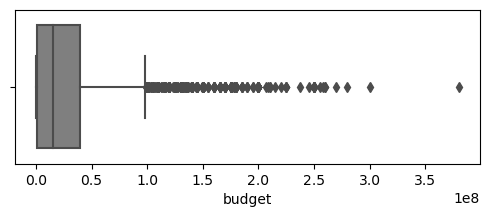

Count	: 4792.0
Mean	: 29.11 million
Standard Deviation	: 40.75 million
Minimum	: 0.00 million
25th Percentile (Q1)	: 0.81 million
Median	: 15.00 million
75th Percentile (Q3)	: 40.00 million
Maximum	: 380.00 million

Interquartile range is 39.20 million
low_limit :  -57.99 million
up_limit  :  98.79 million
Outliers  :  321

------------------------------------------


In [22]:
budget_outliers = detect_outliers_and_describe(clean_df, 'budget', plot=True, notation = "millions",print_iqr_details=True)

In [23]:
clean_df.iloc[budget_outliers]

,budget,genres,id,original_title,popularity,production_companies,release_date,revenue,runtime,vote_average,vote_count,year,month
0,237000000,"[action, adventure, fantasy, science fiction]",19995,Avatar,150.437577,"[ingenious film partners, twentieth century fo...",2009-12-10,2787965087,162.0,7.2,11800,2009,12
1,300000000,"[adventure, fantasy, action]",285,Pirates of the Caribbean: At World's End,139.082615,"[walt disney pictures, jerry bruckheimer films...",2007-05-19,961000000,169.0,6.9,4500,2007,5
2,245000000,"[action, adventure, crime]",206647,Spectre,107.376788,"[columbia pictures, danjaq, b24]",2015-10-26,880674609,148.0,6.3,4466,2015,10
3,250000000,"[action, crime, drama, thriller]",49026,The Dark Knight Rises,112.312950,"[legendary pictures, warner bros., dc entertai...",2012-07-16,1084939099,165.0,7.6,9106,2012,7
4,260000000,"[action, adventure, science fiction]",49529,John Carter,43.926995,[walt disney pictures],2012-03-07,284139100,132.0,6.1,2124,2012,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,150000000,"[adventure, animation, comedy, family, fantasy]",809,Shrek 2,47.320801,"[dreamworks skg, pacific data images (pdi), dr...",2004-05-19,919838758,93.0,6.7,2988,2004,5
566,120000000,"[animation, adventure, comedy, family]",920,Cars,82.643036,"[walt disney pictures, pixar animation studios]",2006-06-08,461983149,117.0,6.6,3877,2006,6
692,150000000,"[animation, family, comedy]",9982,Chicken Little,47.973995,"[walt disney pictures, walt disney feature ani...",2005-11-04,314432665,81.0,5.6,944,2005,11
1062,120000000,"[adventure, animation, comedy, family]",9487,A Bug's Life,87.350802,"[walt disney pictures, pixar animation studios]",1998-11-25,363258859,95.0,6.8,2303,1998,11


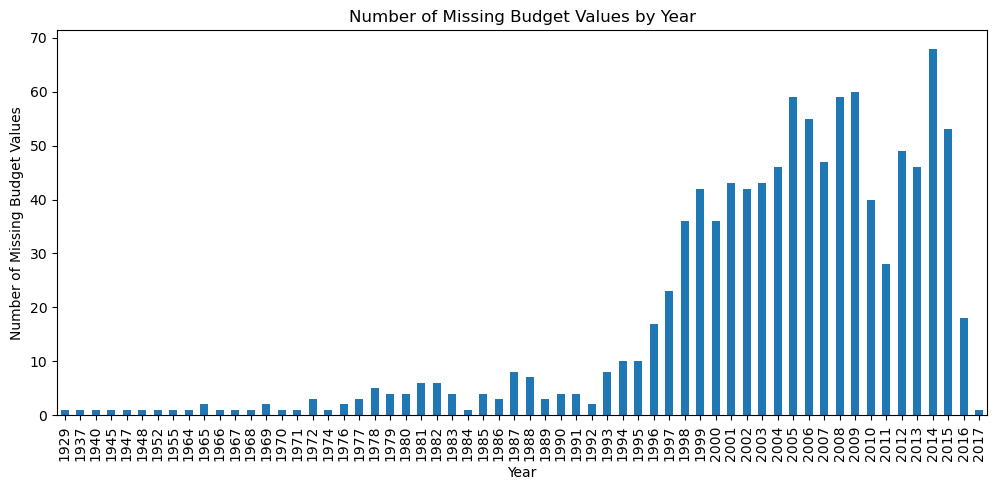

In [24]:
missing_budget_df = clean_df[clean_df["budget"] == 0]
missing_budget_by_year = missing_budget_df.groupby("year").size()

plt.figure(figsize=(12, 5))

missing_budget_by_year.plot(kind="bar")
plt.title("Number of Missing Budget Values by Year")
plt.xlabel("Year")
plt.ylabel("Number of Missing Budget Values")
plt.show()

## Dropping outliers to better calculate the mean
Before replacing the missing values with the mean of the columns, we removed outliers to ensure the mean we calculated is as accurate as possible. 


------------------------------------------


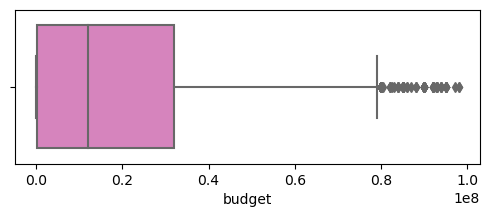

Count	: 4471.0
Mean	: 20.58 million
Standard Deviation	: 23.71 million
Minimum	: 0.00 million
25th Percentile (Q1)	: 0.25 million
Median	: 12.00 million
75th Percentile (Q3)	: 32.00 million
Maximum	: 98.00 million

------------------------------------------


In [25]:
clean_df_copy = clean_df[~clean_df.index.isin(budget_outliers)]
dummy = detect_outliers_and_describe(clean_df_copy, 'budget', plot=True, notation = "millions")
desc_stats = clean_df_copy['budget'].describe()

new_mean = int(desc_stats['mean'].round())


------------------------------------------


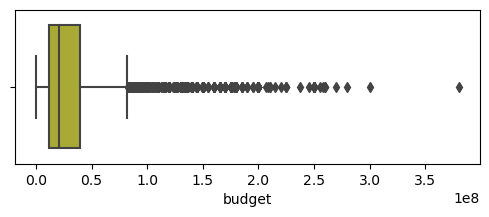

Count	: 4792.0
Mean	: 33.54 million
Standard Deviation	: 38.39 million
Minimum	: 0.00 million
25th Percentile (Q1)	: 12.00 million
Median	: 20.58 million
75th Percentile (Q3)	: 40.00 million
Maximum	: 380.00 million

------------------------------------------


In [26]:
new_df = clean_df.copy()
zero_budget_mask = new_df['budget'] == 0

# Replace the budget values that are 0 with the new mean
new_df.loc[zero_budget_mask, 'budget'] = new_mean
dummy = detect_outliers_and_describe(new_df, 'budget', plot=True, notation = "millions")

In [27]:
clean_df[clean_df["revenue"]==0]

,budget,genres,id,original_title,popularity,production_companies,release_date,revenue,runtime,vote_average,vote_count,year,month
83,27000000,"[action, adventure, science fiction, romance]",79698,The Lovers,2.418535,"[corsan, bliss media, limelight international ...",2015-02-13,0,109.0,4.8,34,2015,2
135,150000000,"[drama, horror, thriller]",7978,The Wolfman,21.214571,"[universal pictures, stuber productions, relat...",2010-02-11,0,102.0,5.5,549,2010,2
265,0,"[comedy, fantasy, family]",10588,The Cat in the Hat,18.251129,"[imagine entertainment, dreamworks skg, univer...",2003-11-21,0,82.0,4.9,366,2003,11
309,84000000,"[fantasy, comedy, family, adventure]",10214,Son of the Mask,17.815595,"[new line cinema, pathé distribution]",2005-02-18,0,94.0,3.6,338,2005,2
376,90000000,"[science fiction, action, drama, thriller]",10357,Volcano,19.836124,[twentieth century fox film corporation],1997-04-25,0,104.0,5.2,376,1997,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,0,"[foreign, thriller]",67238,Cavite,0.022173,[],2005-03-12,0,80.0,7.5,2,2005,3
4799,9000,"[comedy, romance]",72766,Newlyweds,0.642552,[],2011-12-26,0,85.0,5.9,5,2011,12
4800,0,"[comedy, drama, romance, tv movie]",231617,"Signed, Sealed, Delivered",1.444476,"[front street pictures, muse entertainment ent...",2013-10-13,0,120.0,7.0,6,2013,10
4801,0,[],126186,Shanghai Calling,0.857008,[],2012-05-03,0,98.0,5.7,7,2012,5



------------------------------------------


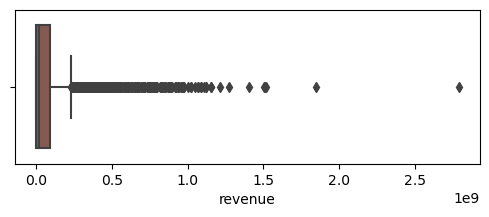

Count	: 4792.0
Mean	: 82.45 million
Standard Deviation	: 163.00 million
Minimum	: 0.00 million
25th Percentile (Q1)	: 0.00 million
Median	: 19.28 million
75th Percentile (Q3)	: 93.26 million
Maximum	: 2787.97 million

Interquartile range is 93.26 million
low_limit :  -139.90 million
up_limit  :  233.16 million
Outliers  :  468

------------------------------------------


In [28]:
revenue_outliers = detect_outliers_and_describe(clean_df, 'revenue', plot=True, notation = "millions",print_iqr_details=True)

In [29]:
clean_df.iloc[revenue_outliers]

,budget,genres,id,original_title,popularity,production_companies,release_date,revenue,runtime,vote_average,vote_count,year,month
0,237000000,"[action, adventure, fantasy, science fiction]",19995,Avatar,150.437577,"[ingenious film partners, twentieth century fo...",2009-12-10,2787965087,162.0,7.2,11800,2009,12
1,300000000,"[adventure, fantasy, action]",285,Pirates of the Caribbean: At World's End,139.082615,"[walt disney pictures, jerry bruckheimer films...",2007-05-19,961000000,169.0,6.9,4500,2007,5
2,245000000,"[action, adventure, crime]",206647,Spectre,107.376788,"[columbia pictures, danjaq, b24]",2015-10-26,880674609,148.0,6.3,4466,2015,10
3,250000000,"[action, crime, drama, thriller]",49026,The Dark Knight Rises,112.312950,"[legendary pictures, warner bros., dc entertai...",2012-07-16,1084939099,165.0,7.6,9106,2012,7
4,260000000,"[action, adventure, science fiction]",49529,John Carter,43.926995,[walt disney pictures],2012-03-07,284139100,132.0,6.1,2124,2012,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3698,4500000,"[adventure, drama]",10339,Moby Dick,5.224593,"[warner bros., moulin productions inc.]",1956-06-27,10400000,116.0,6.9,89,1956,6
3815,3800000,"[war, western]",29715,Major Dundee,3.490215,"[columbia pictures corporation, jerry bresler ...",1965-04-07,14873,123.0,6.2,38,1965,4
3826,5000000,"[thriller, adventure, action]",352978,Chain of Command,1.398981,"[hollywood media bridge, lionsgate, clear lake...",2015-08-30,0,88.0,5.3,11,2015,8
4447,0,"[comedy, drama, romance]",84184,Celeste & Jesse Forever,9.436431,[team todd],2012-08-03,3094813,91.0,6.4,163,2012,8



------------------------------------------


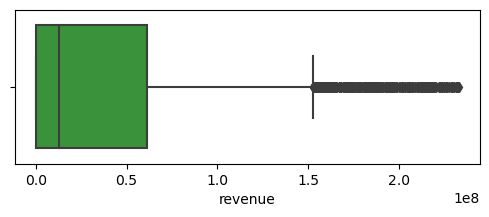

Count	: 4324.0
Mean	: 40.00 million
Standard Deviation	: 55.71 million
Minimum	: 0.00 million
25th Percentile (Q1)	: 0.00 million
Median	: 12.44 million
75th Percentile (Q3)	: 61.00 million
Maximum	: 233.09 million

------------------------------------------


In [30]:
#dropping outliers just to calculate reasonable mean
clean_df_copy = clean_df[~clean_df.index.isin(revenue_outliers)]
dummy2 = detect_outliers_and_describe(clean_df_copy, 'revenue', plot=True, notation = "millions")
desc_stats2 = clean_df_copy['revenue'].describe()
new_mean2 = int(desc_stats2['mean'].round())


------------------------------------------


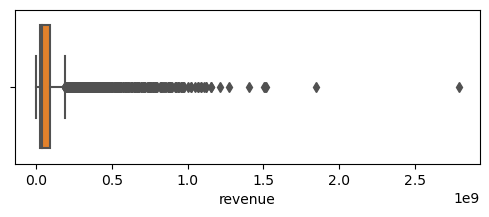

Count	: 4792.0
Mean	: 94.28 million
Standard Deviation	: 157.96 million
Minimum	: 0.00 million
25th Percentile (Q1)	: 27.51 million
Median	: 40.00 million
75th Percentile (Q3)	: 93.26 million
Maximum	: 2787.97 million

------------------------------------------


In [31]:
zero_budget_mask2 = new_df['revenue'] == 0
# Replace the revenue values that are 0 with the new mean
new_df.loc[zero_budget_mask2, 'revenue'] = new_mean2
dummy = detect_outliers_and_describe(new_df, 'revenue', plot=True, notation = "millions")

In [32]:
#recalculating Profit & Return on Investment
drop_columns(new_df, ['profit','roi'])
new_df['profit'] = new_df['revenue'] - new_df['budget']
new_df['roi'] = ((new_df['revenue'] - new_df['budget']) / new_df['budget']).round(3)
new_df.head(2)

,budget,genres,id,original_title,popularity,production_companies,release_date,revenue,runtime,vote_average,vote_count,year,month,profit,roi
0,237000000,"[action, adventure, fantasy, science fiction]",19995,Avatar,150.437577,"[ingenious film partners, twentieth century fo...",2009-12-10,2787965087,162.0,7.2,11800,2009,12,2550965087,10.764
1,300000000,"[adventure, fantasy, action]",285,Pirates of the Caribbean: At World's End,139.082615,"[walt disney pictures, jerry bruckheimer films...",2007-05-19,961000000,169.0,6.9,4500,2007,5,661000000,2.203


# Initial Insights
After imputing the missing values, we can now begin our first phase of analysis.

First, we plotted a general unfiltered correlation matrix that compared all the columns of the clean dataset against one another. We also plotted a scatterplot matrix and printed the correlation coefficient values for all the pairs, for easier interpretation.

In [33]:
# numerical correlation matrix
def num_plotCorrelationMatrix(df, df_name, graphWidth):
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    df = df[numeric_cols]  # Select only numeric columns
    if len(numeric_cols) < 2:
        print(f'No correlation plots shown: There are less than 2 numeric columns in the DataFrame')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=100, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum=1, cmap='coolwarm')  # Change colormap to 'coolwarm'
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for Numerical Columns in {df_name}', fontsize=10)
    plt.show()

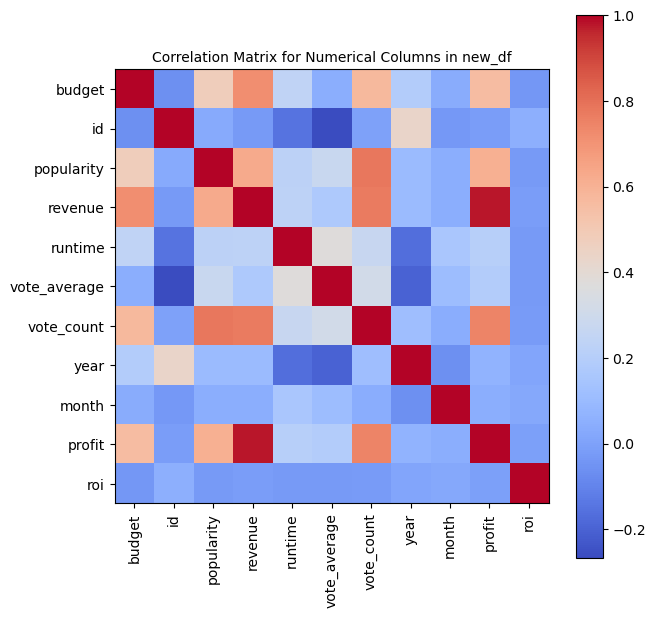

In [34]:
num_plotCorrelationMatrix(new_df,"new_df", 7)

In [35]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include=[np.number])  # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna()
    df = df[[col for col in df if df[col].nunique() > 1]]  # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10:  # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().unstack().sort_values(ascending=False).drop_duplicates()
    ##for i, j in zip(*plt.np.triu_indices_from(ax, k=1)):
       # ax[i, j].annotate('corr\n(%.3f)' % corrs.iloc[i], (0.5, 0.9), xycoords='axes fraction', ha='center', va='center',size=textSize)
    plt.title('Scatter and Density Plot')
    plt.show()
    return corrs

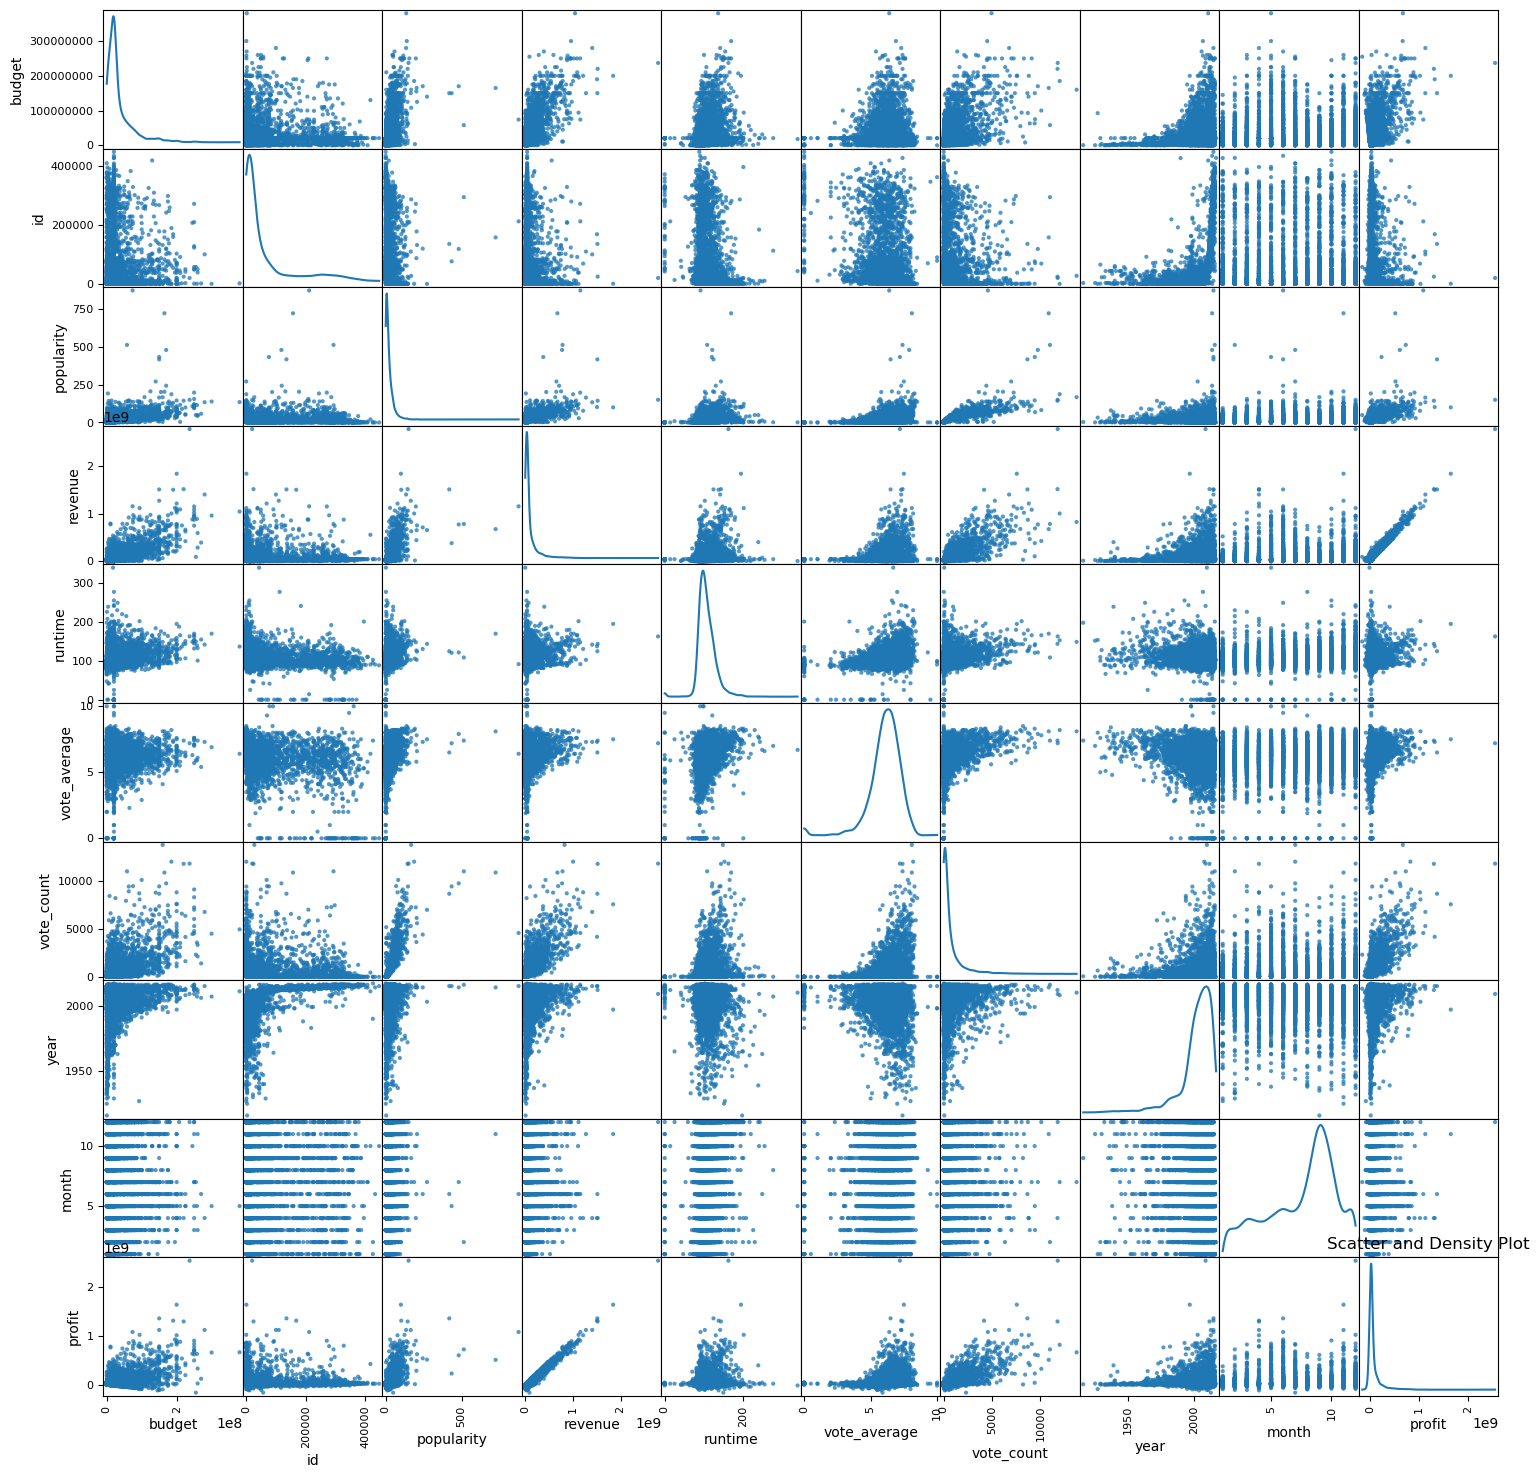

In [36]:
correlation_pairs = plotScatterMatrix(new_df, plotSize=18, textSize=8)

In [37]:
print(correlation_pairs)

budget        budget          1.000000
revenue       profit          0.979425
vote_count    popularity      0.777953
revenue       vote_count      0.769763
profit        vote_count      0.747149
revenue       budget          0.713456
popularity    revenue         0.627333
profit        popularity      0.606040
budget        vote_count      0.572718
profit        budget          0.557370
popularity    budget          0.476690
id            year            0.434562
vote_average  runtime         0.376450
vote_count    vote_average    0.314647
popularity    vote_average    0.274898
runtime       vote_count      0.271866
budget        runtime         0.241056
runtime       revenue         0.231752
popularity    runtime         0.224892
profit        runtime         0.205178
budget        year            0.193226
profit        vote_average    0.189260
revenue       vote_average    0.171884
month         runtime         0.156494
year          vote_count      0.115090
vote_average  month      

Most of these pairs are not of any use, but there are some observations we can make.
We identified the following pairs as relevant to our problem statement:
- Revenue and Budget (0.713456): relatively high correlation is observed, thus the pair can be considered for further exploration.

We had also initially considered using the month of release of the movie as a possible predictor for a movie's success. However, the values of the correlation pairs involving the month are all relatively low, and is thus not promising.

# Linear regression
We used linear regression to model a couple of possible relationships we hypothesised to be influential in predicting the success of the movies
- Budget against profit
- Budget against vote_average (average viewer ratings)

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [39]:
def find_best_random_state(predictor, response, test_size=0.2, random_state_range=range(1, 250)):
    best_random_state = None
    lowest_mse = float('inf')
    for random_state in random_state_range:
        # Split the dataset into train and test sets
        x_train, x_test, y_train, y_test = train_test_split(predictor, response, test_size=test_size, random_state=random_state)
        # Create a Linear Regression object as 'model'
        model = LinearRegression()
        # Train the model using train data
        model.fit(x_train, y_train)
        # Compute MSE on the test set
        y_test_pred = model.predict(x_test)
        test_mse = mean_squared_error(y_test, y_test_pred)
        if test_mse < lowest_mse:
            lowest_mse = test_mse
            best_random_state = random_state
    return best_random_state

In [40]:
import matplotlib.colors as mcolors
def custom_univariate_linear_regression(predictors, responses, test_size=0.2, random_state=None, WantToPlot=False, PrintResults=False):
    if len(predictors) != len(responses):
        print("Number of predictors should match the number of responses")
        return
    for predictor, response in zip(predictors, responses):
        if random_state is None:
            random_state = find_best_random_state(predictor, response)

        x_train, x_test, y_train, y_test = train_test_split(predictor, response, test_size=test_size, random_state=random_state)
        # Generate random RGB color
        color = [random.random() for _ in range(3)]
        # Get contrast color for the regression line
        # Convert RGB to HSV
        hsv = mcolors.rgb_to_hsv(color)
        # Adjust hue by 180 degrees to get complementary color
        hue = (hsv[0] + 0.5) % 1.0
        # Convert back to RGB
        contrast_color = mcolors.hsv_to_rgb([hue, hsv[1], hsv[2]])
        
        # Create a Linear Regression object as 'model'
        model = LinearRegression()
        model.fit(x_train, y_train)

        intercept = model.intercept_[0]
        coefficient = model.coef_[0][0]

        y_train_pred = model.predict(x_train)
        train_mse = mean_squared_error(y_train, y_train_pred)
        y_test_pred = model.predict(x_test)
        test_mse = mean_squared_error(y_test, y_test_pred)

        mse_difference = train_mse - test_mse
        r_squared = model.score(x_train, y_train)

        if WantToPlot:
            plt.figure(figsize=(7, 4))
            sb.scatterplot(x=x_train.iloc[:,0], y=y_train.iloc[:,0], color=color)
            plt.plot(x_train, model.predict(x_train), color=contrast_color)
            plt.xlabel(predictor.columns[0])
            plt.ylabel(response.columns[0])
            plt.title("Linear Regression Line")
            plt.show()
        if PrintResults:
            # Print the results in the same color as the plot
            print('\033[1m\033[95m' + "------------------------------------------------------------------------------------------")
            print("\tRegression Problem: {} = a * {} + b\n".format(response.columns[0], predictor.columns[0]))
            print("\tIntercept of Regression  : b =", intercept)
            print("\tCoefficient of Regression: a =", coefficient)
            print("\n\tMean Squared Error (MSE):")
            print("\t  For train set is \t: ", train_mse)
            print("\t  For test set is \t: ", test_mse)
            print("\tDifference in MSE \t: ", mse_difference)
            print("\n\tExplained Variance (R^2):", r_squared)
            print("------------------------------------------------------------------------------------------")
            print('\033[0m')

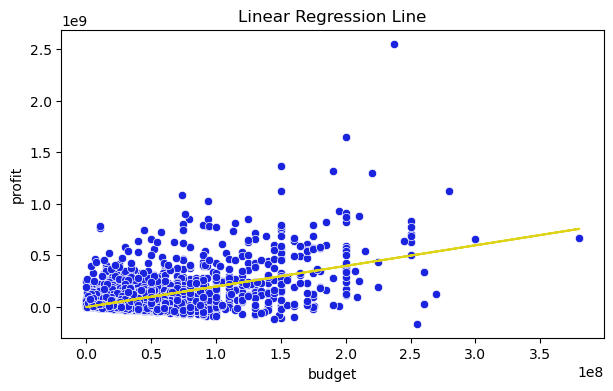

------------------------------------------------------------------------------------------
	Regression Problem: profit = a * budget + b

	Intercept of Regression  : b = -4611948.014724053
	Coefficient of Regression: a = 1.9988328648460847

	Mean Squared Error (MSE):
	  For train set is 	:  1.352944237893108e+16
	  For test set is 	:  7167308718629832.0
	Difference in MSE 	:  6362133660301248.0

	Explained Variance (R^2): 0.31159212204778264
------------------------------------------------------------------------------------------



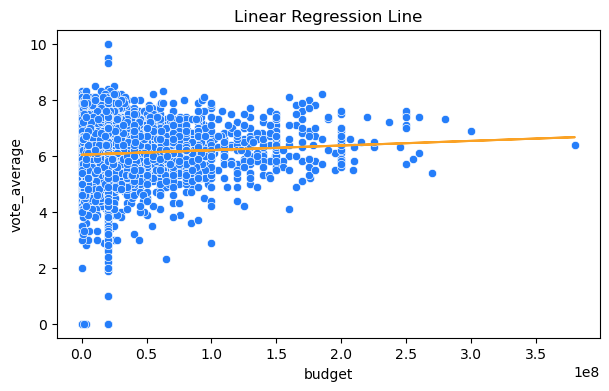

------------------------------------------------------------------------------------------
	Regression Problem: vote_average = a * budget + b

	Intercept of Regression  : b = 6.035090670761055
	Coefficient of Regression: a = 1.6491605297925884e-09

	Mean Squared Error (MSE):
	  For train set is 	:  1.4009324477346967
	  For test set is 	:  1.3871194901260497
	Difference in MSE 	:  0.01381295760864698

	Explained Variance (R^2): 0.002966783593017275
------------------------------------------------------------------------------------------



In [41]:
predictors = [new_df[['budget']], new_df[['budget']]]
responses = [new_df[['profit']], new_df[['vote_average']]]
custom_univariate_linear_regression(predictors, responses, WantToPlot=True, PrintResults=True)

**Budget vs Profit**

The analysis indicates a linear relationship between profit and budget, with an intercept of -4611948.0147 and a coefficient of 1.9988 for the budget variable.

- Explained Variance (R²):
>The R² value of 0.3116 suggests that approximately 31.16% of the variability in profit is explained by changes in budget. While this indicates a relationship between profit and budget, it also implies that other factors beyond budget contribute to profit variability.
- Mean Squared Error (MSE):
>- Train Set MSE: The MSE for the training set is 1.3529 x 10^16. Despite being a large value, it should be considered relative to the scale of profits and budgets in the dataset.
>- Test Set MSE: The MSE for the test set is 7.1673 x 10^15, indicating a more accurate model performance on data that was not used during training.
>- SE Difference: The difference in MSE, 6.3621 x 10^15, while significant, suggests that the model's predictive capability is relatively consistent when applied to both known and unknown data sets.

We deduced that the impact that the budget of a movie has on its profits is not as high as we had previously expected. Thus, we have to further investigate what other factors may contribute to this

**Budget vs Vote_average**

This pair has significantly lower R² value, which indicates an even lower correlation

In [42]:
temp = new_df
temp.head(1)

,budget,genres,id,original_title,popularity,production_companies,release_date,revenue,runtime,vote_average,vote_count,year,month,profit,roi
0,237000000,"[action, adventure, fantasy, science fiction]",19995,Avatar,150.437577,"[ingenious film partners, twentieth century fo...",2009-12-10,2787965087,162.0,7.2,11800,2009,12,2550965087,10.764


# One-hot encoding
To facilitate the analysis of categorical variables such as the genre(s) of a movie, we decided to use one-hot encoding

In [43]:
def one_hot_encode_iterative(df, column):
    original_columns = set(df.columns)
    # Get unique values in the specified column
    unique_values = set()
    for row in df[column]:
        unique_values.update(row)
    # Create one-hot encoded columns for each unique value
    for value in unique_values:
        df[value] = 0
    # Update one-hot encoded columns based on the values in the specified column
    for index, row in df.iterrows():
        for value in row[column]:
            df.at[index, value] = 1
    encoded_columns = set(df.columns)
    # Extract the encoded genres columns
    encoded_cols = list(encoded_columns - original_columns)
    return df, encoded_cols
# Example usage: temp = one_hot_encode_iterative(temp, 'genres')

In [44]:
temp, encoded_genres_cols = one_hot_encode_iterative(temp, 'genres')
temp.head()

,budget,genres,id,original_title,popularity,production_companies,release_date,revenue,runtime,vote_average,...,fantasy,war,history,music,family,adventure,action,animation,foreign,mystery
0,237000000,"[action, adventure, fantasy, science fiction]",19995,Avatar,150.437577,"[ingenious film partners, twentieth century fo...",2009-12-10,2787965087,162.0,7.2,...,1,0,0,0,0,1,1,0,0,0
1,300000000,"[adventure, fantasy, action]",285,Pirates of the Caribbean: At World's End,139.082615,"[walt disney pictures, jerry bruckheimer films...",2007-05-19,961000000,169.0,6.9,...,1,0,0,0,0,1,1,0,0,0
2,245000000,"[action, adventure, crime]",206647,Spectre,107.376788,"[columbia pictures, danjaq, b24]",2015-10-26,880674609,148.0,6.3,...,0,0,0,0,0,1,1,0,0,0
3,250000000,"[action, crime, drama, thriller]",49026,The Dark Knight Rises,112.312950,"[legendary pictures, warner bros., dc entertai...",2012-07-16,1084939099,165.0,7.6,...,0,0,0,0,0,0,1,0,0,0
4,260000000,"[action, adventure, science fiction]",49529,John Carter,43.926995,[walt disney pictures],2012-03-07,284139100,132.0,6.1,...,0,0,0,0,0,1,1,0,0,0


In [45]:
temp[temp["genres"]=='']

new_df = temp # can use the df safely

## Using the one-hot encoded variable
Now, we can conduct initial exploration of the possible impact of the genre(s) of a movie to its success.

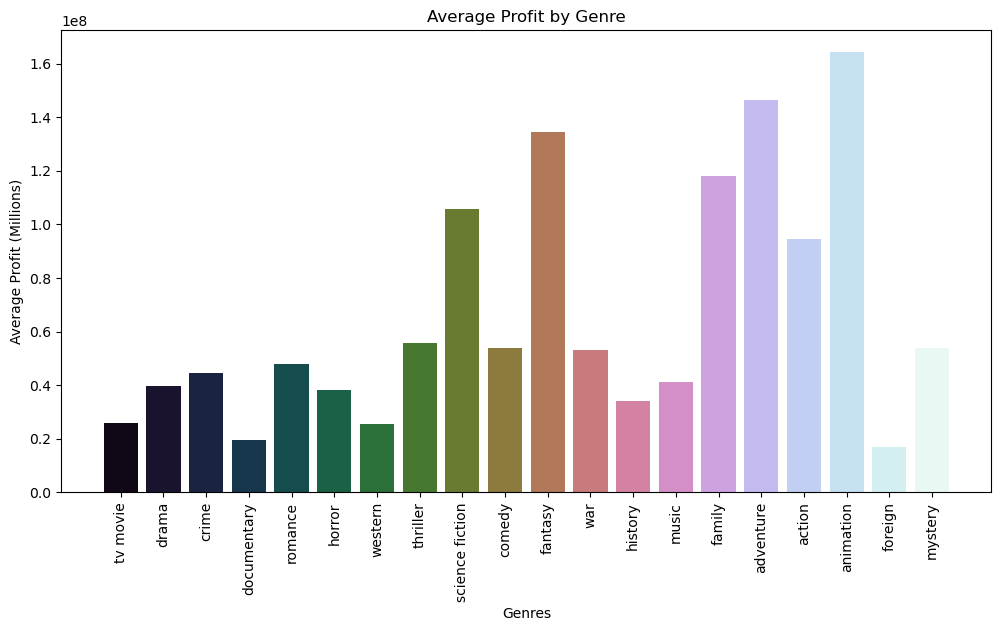

In [46]:
# Now you can use this list to calculate genre profits
genre_profits = {genre: new_df[new_df[genre] == 1]['profit'].mean() for genre in encoded_genres_cols}

colors = sb.color_palette('cubehelix', 20)

plt.figure(figsize=(12, 6))
plt.bar(genre_profits.keys(), genre_profits.values(), color=colors)
plt.xlabel('Genres')
plt.ylabel('Average Profit (Millions)')
plt.title('Average Profit by Genre')
plt.xticks(rotation=90)  # Rotate labels to avoid overlap
plt.show()

From this plot, we can see that genres such as animation, adventure and fantasy were on average more profitable than the other genres

# Continuous to discrete
We decided to divide the entries to 2 broad categories based on their viewer ratings (aka vote_average). We created a boolean variable to determine whether a movie is "voted_as_good", based on whether its ratings were above or below its median.

In [47]:
desc_vote_ave = new_df['vote_average'].describe()
desc_vote_ave

count    4792.000000
mean        6.095597
std         1.184029
min         0.000000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: vote_average, dtype: float64

In [48]:
median_vote_average = desc_vote_ave['50%'].round(3)
print ("Median of 'vote_average' :", median_vote_average)

Median of 'vote_average' : 6.2


In [49]:
def encode_vote(vote):
    if vote < median_vote_average:
        return 0
    else:
        return 1

# Apply the function to create the new column
new_df['voted_as_good'] = new_df['vote_average'].apply(encode_vote)

In [50]:
new_df.head(3)

,budget,genres,id,original_title,popularity,production_companies,release_date,revenue,runtime,vote_average,...,war,history,music,family,adventure,action,animation,foreign,mystery,voted_as_good
0,237000000,"[action, adventure, fantasy, science fiction]",19995,Avatar,150.437577,"[ingenious film partners, twentieth century fo...",2009-12-10,2787965087,162.0,7.2,...,0,0,0,0,1,1,0,0,0,1
1,300000000,"[adventure, fantasy, action]",285,Pirates of the Caribbean: At World's End,139.082615,"[walt disney pictures, jerry bruckheimer films...",2007-05-19,961000000,169.0,6.9,...,0,0,0,0,1,1,0,0,0,1
2,245000000,"[action, adventure, crime]",206647,Spectre,107.376788,"[columbia pictures, danjaq, b24]",2015-10-26,880674609,148.0,6.3,...,0,0,0,0,1,1,0,0,0,1


# Considering other success metrics
We wanted to check if we were able to use other variables given in the dataset as response variables to our prediction models, namely the "popularity" rating.


------------------------------------------


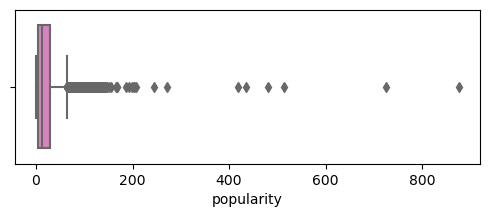

Count	: 4792.0
Mean	: 21.54
Standard Deviation	: 31.84
Minimum	: 0.00
25th Percentile (Q1)	: 4.74
Median	: 12.97
75th Percentile (Q3)	: 28.36
Maximum	: 875.58

Interquartile range is 23.64
low_limit :  -30.73
up_limit  :  63.84
Outliers  :  275

------------------------------------------

------------------------------------------


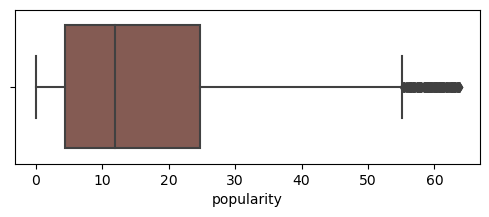

Count	: 4517.0
Mean	: 16.46
Standard Deviation	: 15.11
Minimum	: 0.00
25th Percentile (Q1)	: 4.32
Median	: 11.83
75th Percentile (Q3)	: 24.66
Maximum	: 63.66

------------------------------------------


In [51]:
tmp = detect_outliers_and_describe(new_df, 'popularity', plot=True, notation = None,print_iqr_details=True)
tt = new_df
#dropping outliers just to calculate reasonable mean
tt = tt[~tt.index.isin(tmp)]
dummy = detect_outliers_and_describe(tt, 'popularity', plot=True, notation =None)

Through the above analysis, we decided against using popularity as one of our response variables, due to several reasons
- While the components of the rating system are publicly displayed, TMDB has not disclosed the weights or the relationships between each component
- As a result of this, the values appeared to be arbitrary, with some jarring outliers
- Drawing meaningful insights or patterns from this variable during our analysis may thus prove to be challenging
Therefore, we will not be using this popularity rating as a response variable in future analysis

# Decision Trees
We will now be using decision trees to classify these movies based on selected variables

In [52]:
from sklearn.model_selection import train_test_split as splitter  # Splitting data
from sklearn.linear_model import LinearRegression  # Linear Regression model
from sklearn.metrics import mean_squared_error  # Mean Squared Error
from sklearn.metrics import explained_variance_score  # Explained Variance Score
from sklearn.metrics import r2_score  # R-squared Score
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Decision Tree Classifier and Plot Tree
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score  # Confusion Matrix and Classification Metrics

def fit_and_print_classification_tree(X, Y, max_depth, class_names):
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X, Y)
    plt.figure(figsize=(15, 15))
    plot_tree(clf, filled=True, feature_names=X.columns.tolist(), class_names=class_names)
    plt.title(f"Decision Tree with Max Depth {max_depth}")
    plt.show()
    return clf

def classification_tree_analysis(Pred,Resp,test_siz,rand_state,needTranslation=False,cls_names=None,wantToPrintCM=False,model_labl=None):
    #Splitting Data into 75:25 w/ test_size=0.25
    P = Pred
    R = Resp
    if needTranslation:
        R = R.replace({'Y': 1, 'N': 0}) # translating into numerical type
    trainX, testX, trainY, testY = splitter(P, R, test_size=test_siz, random_state = rand_state) #splitting data
    Depth_model = fit_and_print_classification_tree(trainX, trainY, max_depth=3, class_names=cls_names)
    if wantToPrintCM:
        print_confusion_matrix((trainX, testX, trainY, testY), Depth_model, model_label=model_labl)

In [90]:
def print_confusion_matrix(data_split, decision_tree_model, model_label=None):
    train_features, test_features, train_labels, test_labels = data_split
    train_labels_pred = decision_tree_model.predict(train_features)
    test_labels_pred = decision_tree_model.predict(test_features)
    print('\033[1m\033[92m'+"------------------------------------------------------------------------------------------")
    print("\tConfusion Matrix and Accuracy Metrics", model_label)
    print("------------------------------------------------------------------------------------------")
    
    # Plot the two-way Confusion Matrix
    fig, axes = plt.subplots(1, 2, figsize=(12, 4)) 
    sb.heatmap(confusion_matrix(train_labels, train_labels_pred), 
               annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0], 
               xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    sb.heatmap(confusion_matrix(test_labels, test_labels_pred), 
               annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1], 
               xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    
    train_conf_matrix = confusion_matrix(train_labels, train_labels_pred)
    test_conf_matrix = confusion_matrix(test_labels, test_labels_pred)

    # Compute True Positive Rate (Sensitivity/Recall) and False Positive Rate
    train_true_positive = train_conf_matrix[1, 1]
    train_false_negative = train_conf_matrix[1, 0]
    train_true_positive_rate = train_true_positive / (train_true_positive + train_false_negative)

    test_true_positive = test_conf_matrix[1, 1]
    test_false_negative = test_conf_matrix[1, 0]
    test_true_positive_rate = test_true_positive / (test_true_positive + test_false_negative)
    
    # Compute False Positive Rate
    train_false_positive = train_conf_matrix[0, 1]
    train_true_negative = train_conf_matrix[0, 0]
    train_false_positive_rate = train_false_positive / (train_false_positive + train_true_negative)

    test_false_positive = test_conf_matrix[0, 1]
    test_true_negative = test_conf_matrix[0, 0]
    test_false_positive_rate = test_false_positive / (test_false_positive + test_true_negative)
    plt.show()
    
    print('\033[1m\033[92m'+"------------------------------------------------------------------------------------------")
    print("\tClassification Accuracy\t:", decision_tree_model.score(test_features, test_labels))# Print the Classification Accuracy
    print("------------------------------------------------------------------------------------------")
    print("\tTrue Positive Rate  - Train\t:", train_true_positive_rate)
    print("\tTrue Positive Rate  - Test\t:", test_true_positive_rate)
    print("\tFalse Positive Rate - Train\t:", train_false_positive_rate)
    print("\tFalse Positive Rate - Test\t:", test_false_positive_rate)
    print("------------------------------------------------------------------------------------------")
    print('\033[0m')

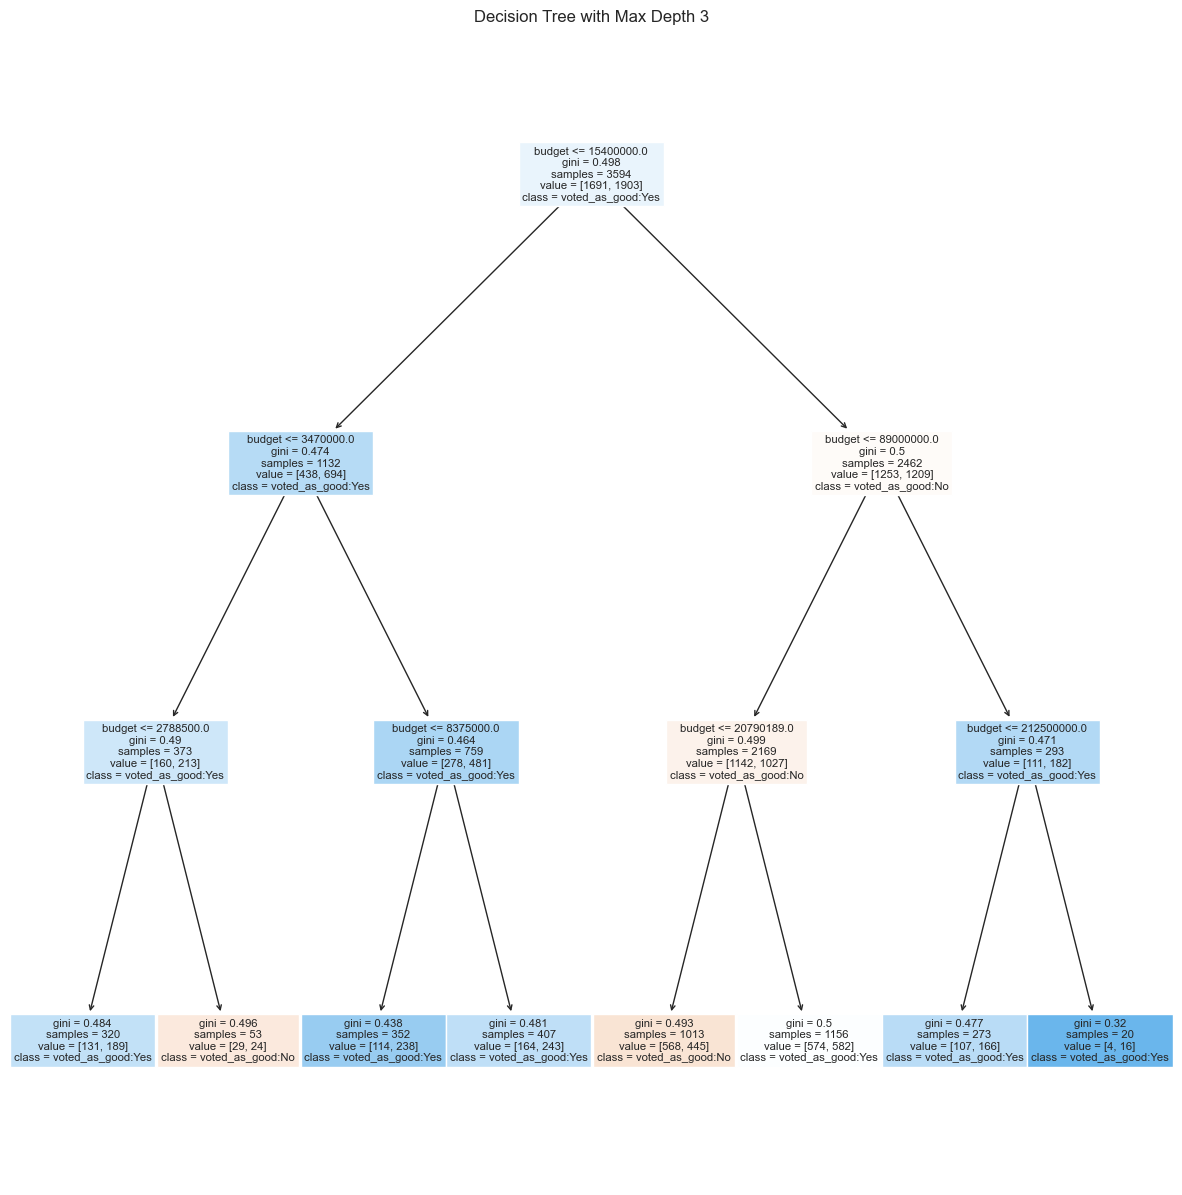

------------------------------------------------------------------------------------------
	Confusion Matrix and Accuracy Metrics of max depth 3
------------------------------------------------------------------------------------------


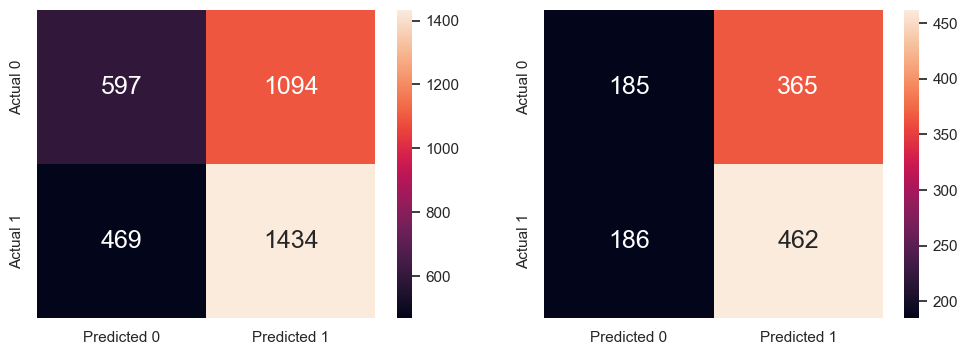

------------------------------------------------------------------------------------------
	Classification Accuracy	: 0.5400667779632721
------------------------------------------------------------------------------------------
	True Positive Rate  - Train	: 0.7535470310036784
	True Positive Rate  - Test	: 0.7129629629629629
	False Positive Rate - Train	: 0.6469544648137197
	False Positive Rate - Test	: 0.6636363636363637
------------------------------------------------------------------------------------------



In [91]:
Pred = pd.DataFrame(temp['budget'])       
Resp = pd.DataFrame(temp['voted_as_good'])

classification_tree_analysis(Pred,Resp,test_siz=0.25,rand_state=13,needTranslation=True,cls_names=['voted_as_good:No', 'voted_as_good:Yes'],wantToPrintCM=True,model_labl='of max depth 3')

We can deduce from the results of the confusion matrix that since the classification accuracy is relatively low (0.541), budget may not be a reliable predictor for the average viewer ratings for the movie.

In [55]:
#Used this block for exporting data for local analysis  <<<<<<<<<<<<< REMOVE
import datetime
#new_df.to_csv(f"datasets/temp_sets/temp_{datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}.csv", index=False)

# Random forests
An extension to using decision trees, we wanted to investigate by using random forests as a method of classification. However, as opposed to classification trees, it is not practical to display the random forest to analyse it. 
Instead, we will be using indicators such as confusion matrices and feature importances to measure its effectiveness.

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

def print_confusion_matrix2(data_split, rf_model, model_label=None):
    X_train, X_test, y_train, y_test = data_split
    
    # Convert regression predictions to binary class labels
    threshold = 0.5  # You can adjust this threshold as per your requirement
    train_labels_pred = np.where(rf_model.predict(X_train) > threshold, 1, 0)
    test_labels_pred = np.where(rf_model.predict(X_test) > threshold, 1, 0)
    
    print('\033[1m\033[92m'+"------------------------------------------------------------------------------------------")
    print("\tConfusion Matrix and Accuracy Metrics", model_label)
    print("------------------------------------------------------------------------------------------")
    # Plot the two-way Confusion Matrix
    fig, axes = plt.subplots(1, 2, figsize=(12, 4)) 
    sb.heatmap(confusion_matrix(y_train, train_labels_pred), 
               annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0], 
               xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    sb.heatmap(confusion_matrix(y_test, test_labels_pred), 
               annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1], 
               xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

    plt.show()
    
    # Compute True Positive Rate and False Positive Rate
    train_tp = np.sum((y_train == 1) & (train_labels_pred == 1))
    train_fn = np.sum((y_train == 1) & (train_labels_pred == 0))
    test_tp = np.sum((y_test == 1) & (test_labels_pred == 1))
    test_fn = np.sum((y_test == 1) & (test_labels_pred == 0))
    
    train_fp = np.sum((y_train == 0) & (train_labels_pred == 1))
    train_tn = np.sum((y_train == 0) & (train_labels_pred == 0))
    test_fp = np.sum((y_test == 0) & (test_labels_pred == 1))
    test_tn = np.sum((y_test == 0) & (test_labels_pred == 0))
    
    train_tpr = train_tp / (train_tp + train_fn)
    test_tpr = test_tp / (test_tp + test_fn)
    
    train_fpr = train_fp / (train_fp + train_tn)
    test_fpr = test_fp / (test_fp + test_tn)
    
    # Calculate classification accuracy
    accuracy = accuracy_score(y_train, train_labels_pred)
    
    print('\033[1m\033[92m'+"------------------------------------------------------------------------------------------")
    print("\tClassification Accuracy\t:", accuracy)
    print("------------------------------------------------------------------------------------------")
    print('\033[1m\033[92m'+"------------------------------------------------------------------------------------------")
    print("\tTrue Positive Rate  - Train\t:", train_tpr)
    print("\tTrue Positive Rate  - Test\t:", test_tpr)
    print("\tFalse Positive Rate - Train\t:", train_fpr)
    print("\tFalse Positive Rate - Test\t:", test_fpr)
    print("------------------------------------------------------------------------------------------")
    print('\033[0m')


When predicting continuous variables using random forests, it is difficult to apply the usual methods, such as confusion matrix. As such, we utilised the categorical interpretation of our "vote_average" variable, which is the "voted_as_good" variable instead, to allow for binary classification.

Mean Squared Error: 0.2573686208811207
------------------------------------------------------------------------------------------
	Confusion Matrix and Accuracy Metrics Random Forest
------------------------------------------------------------------------------------------


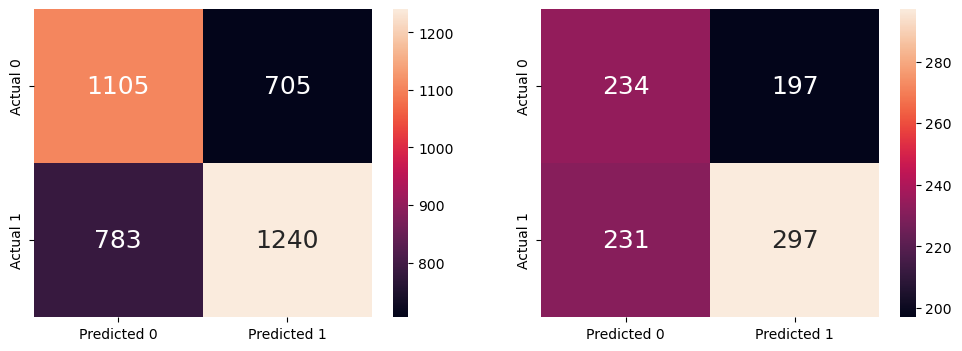

------------------------------------------------------------------------------------------
	Classification Accuracy	: 0.6117923297678058
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
	True Positive Rate  - Train	: 0.6129510627780524
	True Positive Rate  - Test	: 0.5625
	False Positive Rate - Train	: 0.38950276243093923
	False Positive Rate - Test	: 0.45707656612529
------------------------------------------------------------------------------------------



In [57]:
X = temp[['budget']]
y = temp['voted_as_good']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Print confusion matrix for the Random Forest model
print_confusion_matrix2((X_train, X_test, y_train, y_test), rf_model, model_label="Random Forest")

When compared to the results of the decision tree using the same pair of variables, we can see that the classification accuracy of the confusion matrix produced by the random forest is considerably higher (0.612 > 0.540). Thus, we can conclude that the random forests are likely to provide better preditions than the decision trees.

Mean Squared Error: 0.23569780309465185
------------------------------------------------------------------------------------------
	Confusion Matrix and Accuracy Metrics Random Forest
------------------------------------------------------------------------------------------


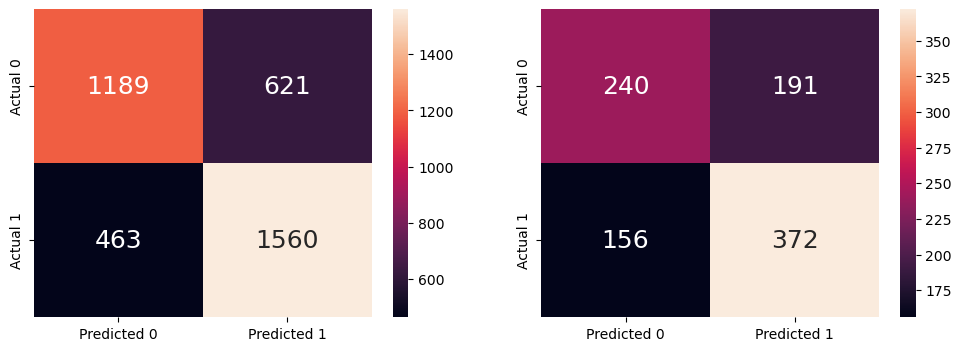

------------------------------------------------------------------------------------------
	Classification Accuracy	: 0.7171927993738586
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
	True Positive Rate  - Train	: 0.7711319822046465
	True Positive Rate  - Test	: 0.7045454545454546
	False Positive Rate - Train	: 0.3430939226519337
	False Positive Rate - Test	: 0.4431554524361949
------------------------------------------------------------------------------------------



In [58]:
X = temp[encoded_genres_cols]
y = temp['voted_as_good']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Print confusion matrix for the Random Forest model
print_confusion_matrix2((X_train, X_test, y_train, y_test), rf_model, model_label="Random Forest")

However, we still wanted to find out any relationships that the continuous variable could have with the same predictor variable (ie genres). Therefore, we found alternative ways to present the results of our random forests, whcih included scatter and residual plots.
- Scatter plot: we plotted the true values against the predicted values. The closer the points are to forming a diagonal line (from bottom-left to top-left) the better the predictions are
- Residual plot: resisuals refer to the differences between the true and predicted values. ideally, the points should be clustered around the horizontal line y = 0, indicating accurate predictions

Mean Squared Error: 1.2008806824841358
Correlation Coefficient of scatter plot: 0.37854533952921376


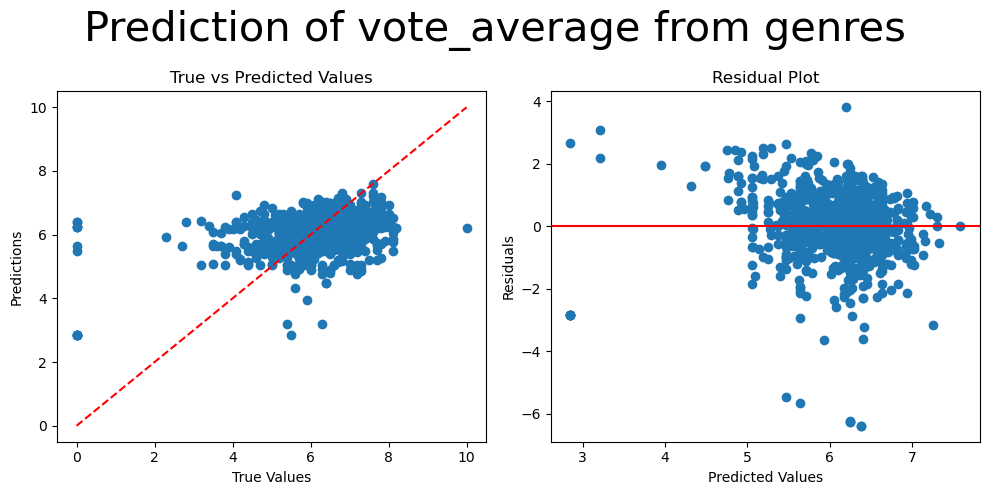

In [59]:
# Assuming 'temp' is your DataFrame with predictor variables (encoded genres) and response variable (average viewer rating)

# Split data into predictors (X) and response (y)
X = temp[encoded_genres_cols]
y = temp['vote_average']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))  
# Plot predicted vs true values
axes[0].scatter(y_test, predictions)
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
axes[0].set_xlabel('True Values')
axes[0].set_ylabel('Predictions')
axes[0].set_title('True vs Predicted Values')
correlation_coefficient = np.corrcoef(y_test, predictions)[0, 1]

print("Correlation Coefficient of scatter plot:", correlation_coefficient)

# Plot residuals
residuals = y_test - predictions
axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot')
axes[1].axhline(y=0, color='r', linestyle='-')

fig.suptitle('Prediction of vote_average from genres', fontsize=30)
plt.tight_layout()
plt.show()

Mean Squared Error: 1.2625336283008172e+16
Correlation Coefficient of scatter plot: 0.4719496684541295


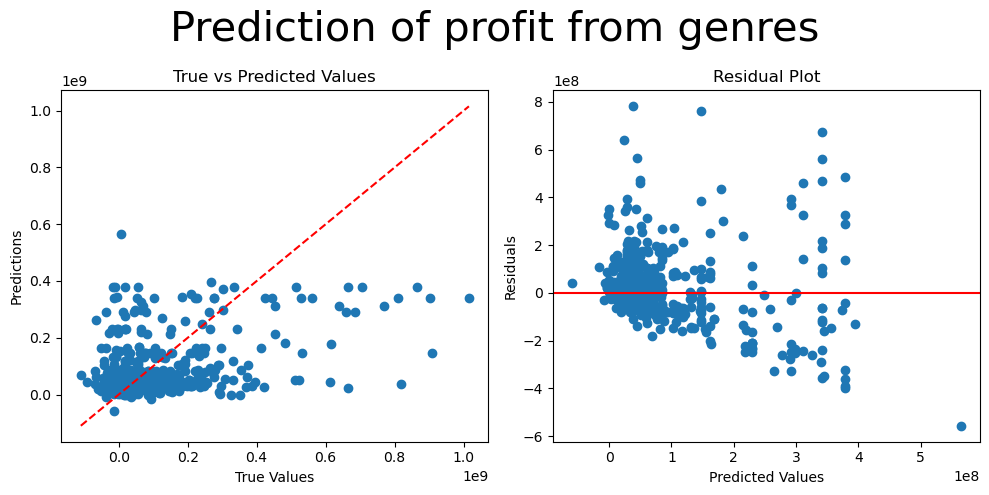

In [60]:
# Assuming 'temp' is your DataFrame with predictor variables (encoded genres) and response variable (average viewer rating)

# Split data into predictors (X) and response (y)
X = temp[encoded_genres_cols]
y = temp['profit']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))  
# Plot predicted vs true values
axes[0].scatter(y_test, predictions)
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
axes[0].set_xlabel('True Values')
axes[0].set_ylabel('Predictions')
axes[0].set_title('True vs Predicted Values')
correlation_coefficient = np.corrcoef(y_test, predictions)[0, 1]

print("Correlation Coefficient of scatter plot:", correlation_coefficient)

# Plot residuals
residuals = y_test - predictions
axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot')
axes[1].axhline(y=0, color='r', linestyle='-')

fig.suptitle('Prediction of profit from genres', fontsize=30)
plt.tight_layout()
plt.show()

Mean Squared Error: 1.3908899712011202
Correlation Coefficient of scatter plot: 0.16196753413741974


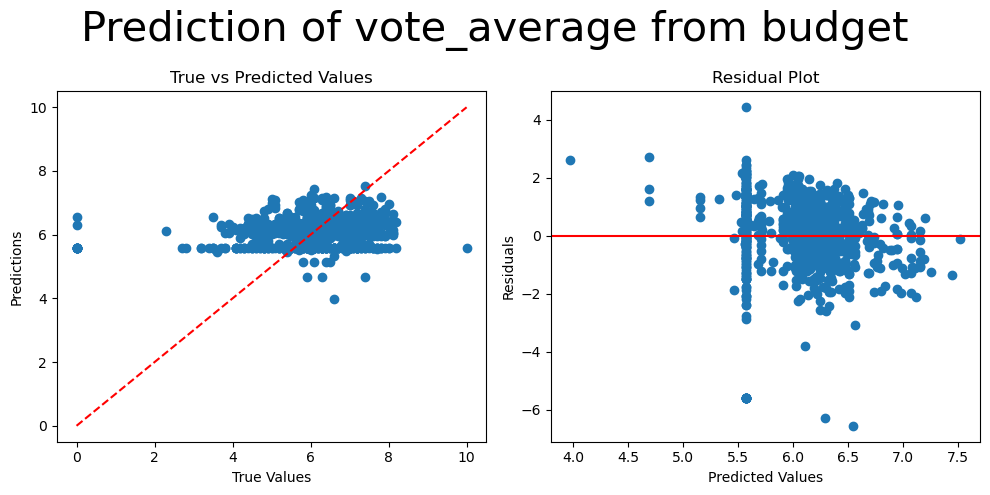

In [61]:
X = temp[['budget']]
y = temp['vote_average']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot predicted vs true values
axes[0].scatter(y_test, predictions)
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
axes[0].set_xlabel('True Values')
axes[0].set_ylabel('Predictions')
axes[0].set_title('True vs Predicted Values')
correlation_coefficient = np.corrcoef(y_test, predictions)[0, 1]

print("Correlation Coefficient of scatter plot:", correlation_coefficient)

# Plot residuals
residuals = y_test - predictions
axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot')
axes[1].axhline(y=0, color='r', linestyle='-')

fig.suptitle('Prediction of vote_average from budget', fontsize=30)
plt.tight_layout()
plt.show()

Mean Squared Error: 1.0762953061727108e+16
Correlation Coefficient of scatter plot: 0.5937396618809831


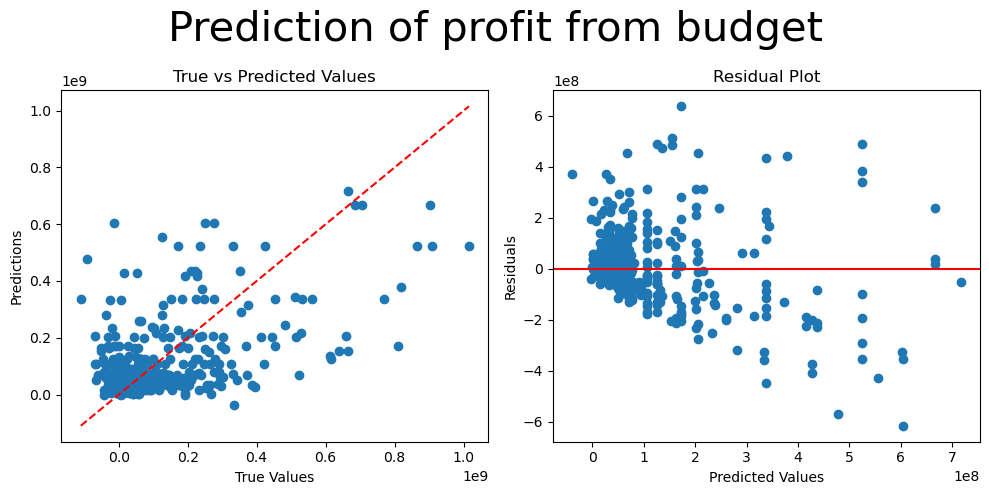

In [62]:
X = temp[['budget']]
y = temp['profit']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot predicted vs true values
axes[0].scatter(y_test, predictions)
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
axes[0].set_xlabel('True Values')
axes[0].set_ylabel('Predictions')
axes[0].set_title('True vs Predicted Values')
correlation_coefficient = np.corrcoef(y_test, predictions)[0, 1]

print("Correlation Coefficient of scatter plot:", correlation_coefficient)

# Plot residuals
residuals = y_test - predictions
axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot')
axes[1].axhline(y=0, color='r', linestyle='-')

fig.suptitle('Prediction of profit from budget', fontsize=30)
plt.tight_layout()
plt.show()

For the following plots, we explored using multiple input variables. As such, we also added a graph that compares the relative feature importances of the different input variables. 

Mean Squared Error: 1.3233471743787506
Correlation Coefficient of scatter plot: 0.37502849892038076


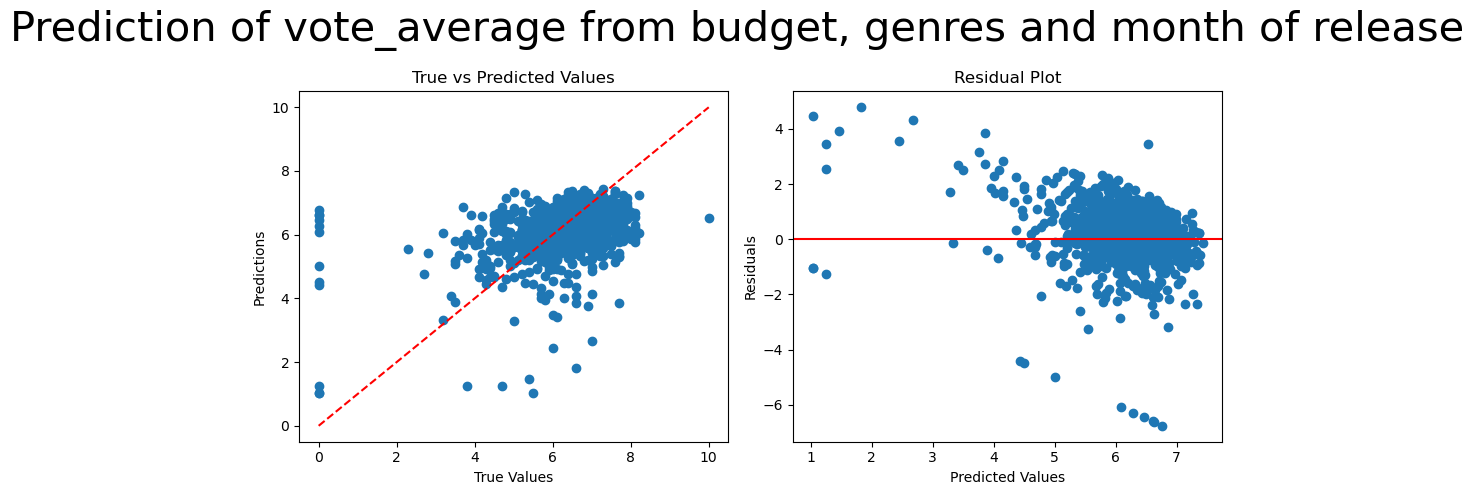

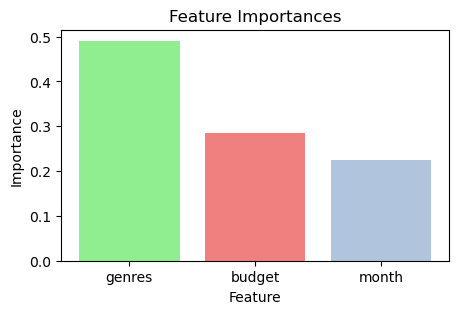

In [63]:
X = temp[['budget', *encoded_genres_cols, 'month']]
y = temp['vote_average']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))  
# Plot predicted vs true values
axes[0].scatter(y_test, predictions)
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
axes[0].set_xlabel('True Values')
axes[0].set_ylabel('Predictions')
axes[0].set_title('True vs Predicted Values')
correlation_coefficient = np.corrcoef(y_test, predictions)[0, 1]

print("Correlation Coefficient of scatter plot:", correlation_coefficient)

# Plot residuals
residuals = y_test - predictions
axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot')
axes[1].axhline(y=0, color='r', linestyle='-')

fig.suptitle('Prediction of vote_average from budget, genres and month of release', fontsize=30)
plt.tight_layout()
plt.show()

# Get feature importances
importances = rf_model.feature_importances_

genre_indices = [X_train.columns.get_loc(col) for col in encoded_genres_cols]

total_genre_importance = np.sum(importances[genre_indices])

importances = np.delete(importances, genre_indices)

columns = np.delete(X_train.columns, genre_indices)

importances = np.append(importances, total_genre_importance)

columns = np.append(columns, 'genres')

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

colors = ['lightgreen', 'lightcoral', 'lightsteelblue']

plt.figure(figsize=(5, 3))
plt.title("Feature Importances")
for i in range(len(importances)):
    plt.bar(i, importances[indices[i]], align="center", color=colors[i])
plt.xticks(range(len(importances)), columns[indices])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

Mean Squared Error: 9736292107009330.0
Correlation Coefficient of scatter plot: 0.6387146003237004


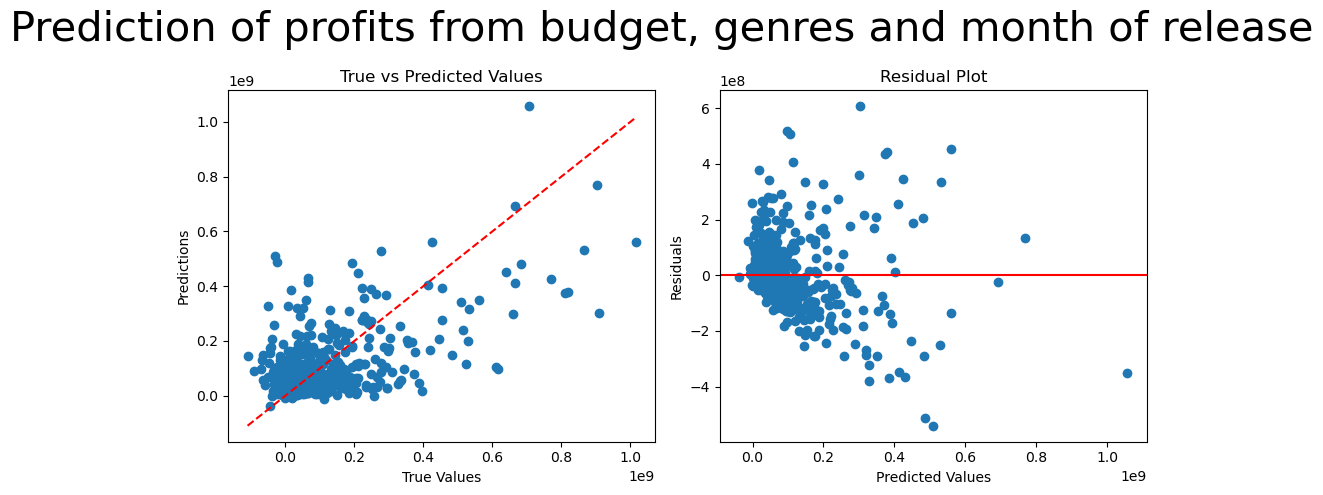

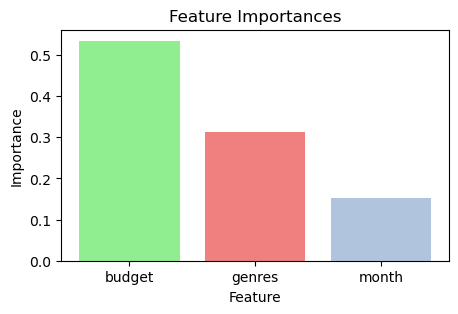

In [64]:
X = temp[['budget', *encoded_genres_cols, 'month']]
y = temp['profit']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))  
# Plot predicted vs true values
axes[0].scatter(y_test, predictions)
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
axes[0].set_xlabel('True Values')
axes[0].set_ylabel('Predictions')
axes[0].set_title('True vs Predicted Values')
correlation_coefficient = np.corrcoef(y_test, predictions)[0, 1]

print("Correlation Coefficient of scatter plot:", correlation_coefficient)

# Plot residuals
residuals = y_test - predictions
axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot')
axes[1].axhline(y=0, color='r', linestyle='-')

fig.suptitle('Prediction of profits from budget, genres and month of release', fontsize=30)
plt.tight_layout()
plt.show()

# Get feature importances
importances = rf_model.feature_importances_

genre_indices = [X_train.columns.get_loc(col) for col in encoded_genres_cols]

total_genre_importance = np.sum(importances[genre_indices])

importances = np.delete(importances, genre_indices)

columns = np.delete(X_train.columns, genre_indices)

importances = np.append(importances, total_genre_importance)

columns = np.append(columns, 'genres')

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

colors = ['lightgreen', 'lightcoral', 'lightsteelblue']

plt.figure(figsize=(5, 3))
plt.title("Feature Importances")
for i in range(len(importances)):
    plt.bar(i, importances[indices[i]], align="center", color=colors[i])
plt.xticks(range(len(importances)), columns[indices])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

### Analysis

Using the above plots, we picked out which relationship we felt was the most impactful in helping us in our problem, which is the prediction of profits from the budget, genres and month of release. 
This relationship had the highest correlation coefficient of 0.640, which implies a relatively strong correlation between the 3 predictor variables collectively and the profitability of the movie. In addition, there is a clear distinction in feature importances, which allows us to confidently conclude that the budget of a movie is the most influential factor, of the 3 features,  in predicting the movie's profits, followed by its genre(s) and month of release.

In [65]:
# Assuming 'temp' is your DataFrame
#column_list = temp.columns.tolist()
#print(column_list)

# K-means clustering
As part of learning something new, we decided on using K-means clustering, a type of unsupervised learning. First, we use the elbow plot to find at which point does increasing the number of clusters no longer provide significant gains in the model's performance.  
Then, this model groups our data points based on how close they are to a center point, called a centroid, thus helping us find patterns and connections within our data. 

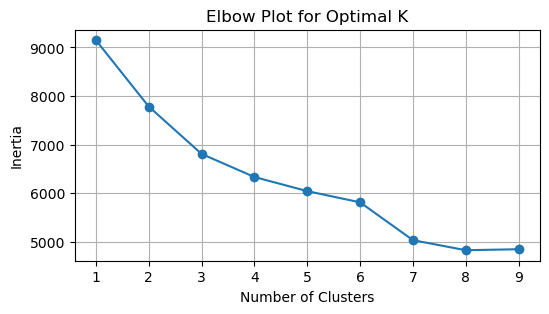

In [66]:
from sklearn.cluster import KMeans

def optimise_k_means(data, max_k):
    means = []
    inertias = []
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k, n_init='auto') 
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
    # Generate the elbow plot
    plt.figure(figsize=(6, 3)) 
    plt.plot(means, inertias, 'o-') 
    plt.xlabel('Number of Clusters') 
    plt.ylabel('Inertia') 
    plt.title('Elbow Plot for Optimal K')  # Added title for clarity
    plt.grid(True)
    plt.show()

# Example usage: optimise_k_means(data, max_k)
cols = ['tv movie', 'family', 'drama', 'romance', 'mystery', 'western', 'comedy', 'documentary', 'foreign', 'fantasy', 'adventure', 'animation', 'action', 'crime', 'horror', 'thriller', 'history', 'science fiction', 'music', 'war']

# these are the columns for model fitting
optimise_k_means(temp[cols], 10)


In [67]:
# Explicitly setting n_init to suppress the warning
kmeans = KMeans(n_clusters=6, n_init=10)

kmeans.fit(temp[cols])

# Assign cluster labels to the data
temp['kmeans_genres'] = kmeans.labels_

In [68]:
temp.head(1)

,budget,genres,id,original_title,popularity,production_companies,release_date,revenue,runtime,vote_average,...,history,music,family,adventure,action,animation,foreign,mystery,voted_as_good,kmeans_genres
0,237000000,"[action, adventure, fantasy, science fiction]",19995,Avatar,150.437577,"[ingenious film partners, twentieth century fo...",2009-12-10,2787965087,162.0,7.2,...,0,0,0,1,1,0,0,0,1,2


In [69]:
def plotScatterMatrixWithC(df, plotSize, textSize, c_var):
    df = df.select_dtypes(include=[np.number])  # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna()
    df = df[[col for col in df if df[col].nunique() > 1]]  # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10:  # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde',c=c_var)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

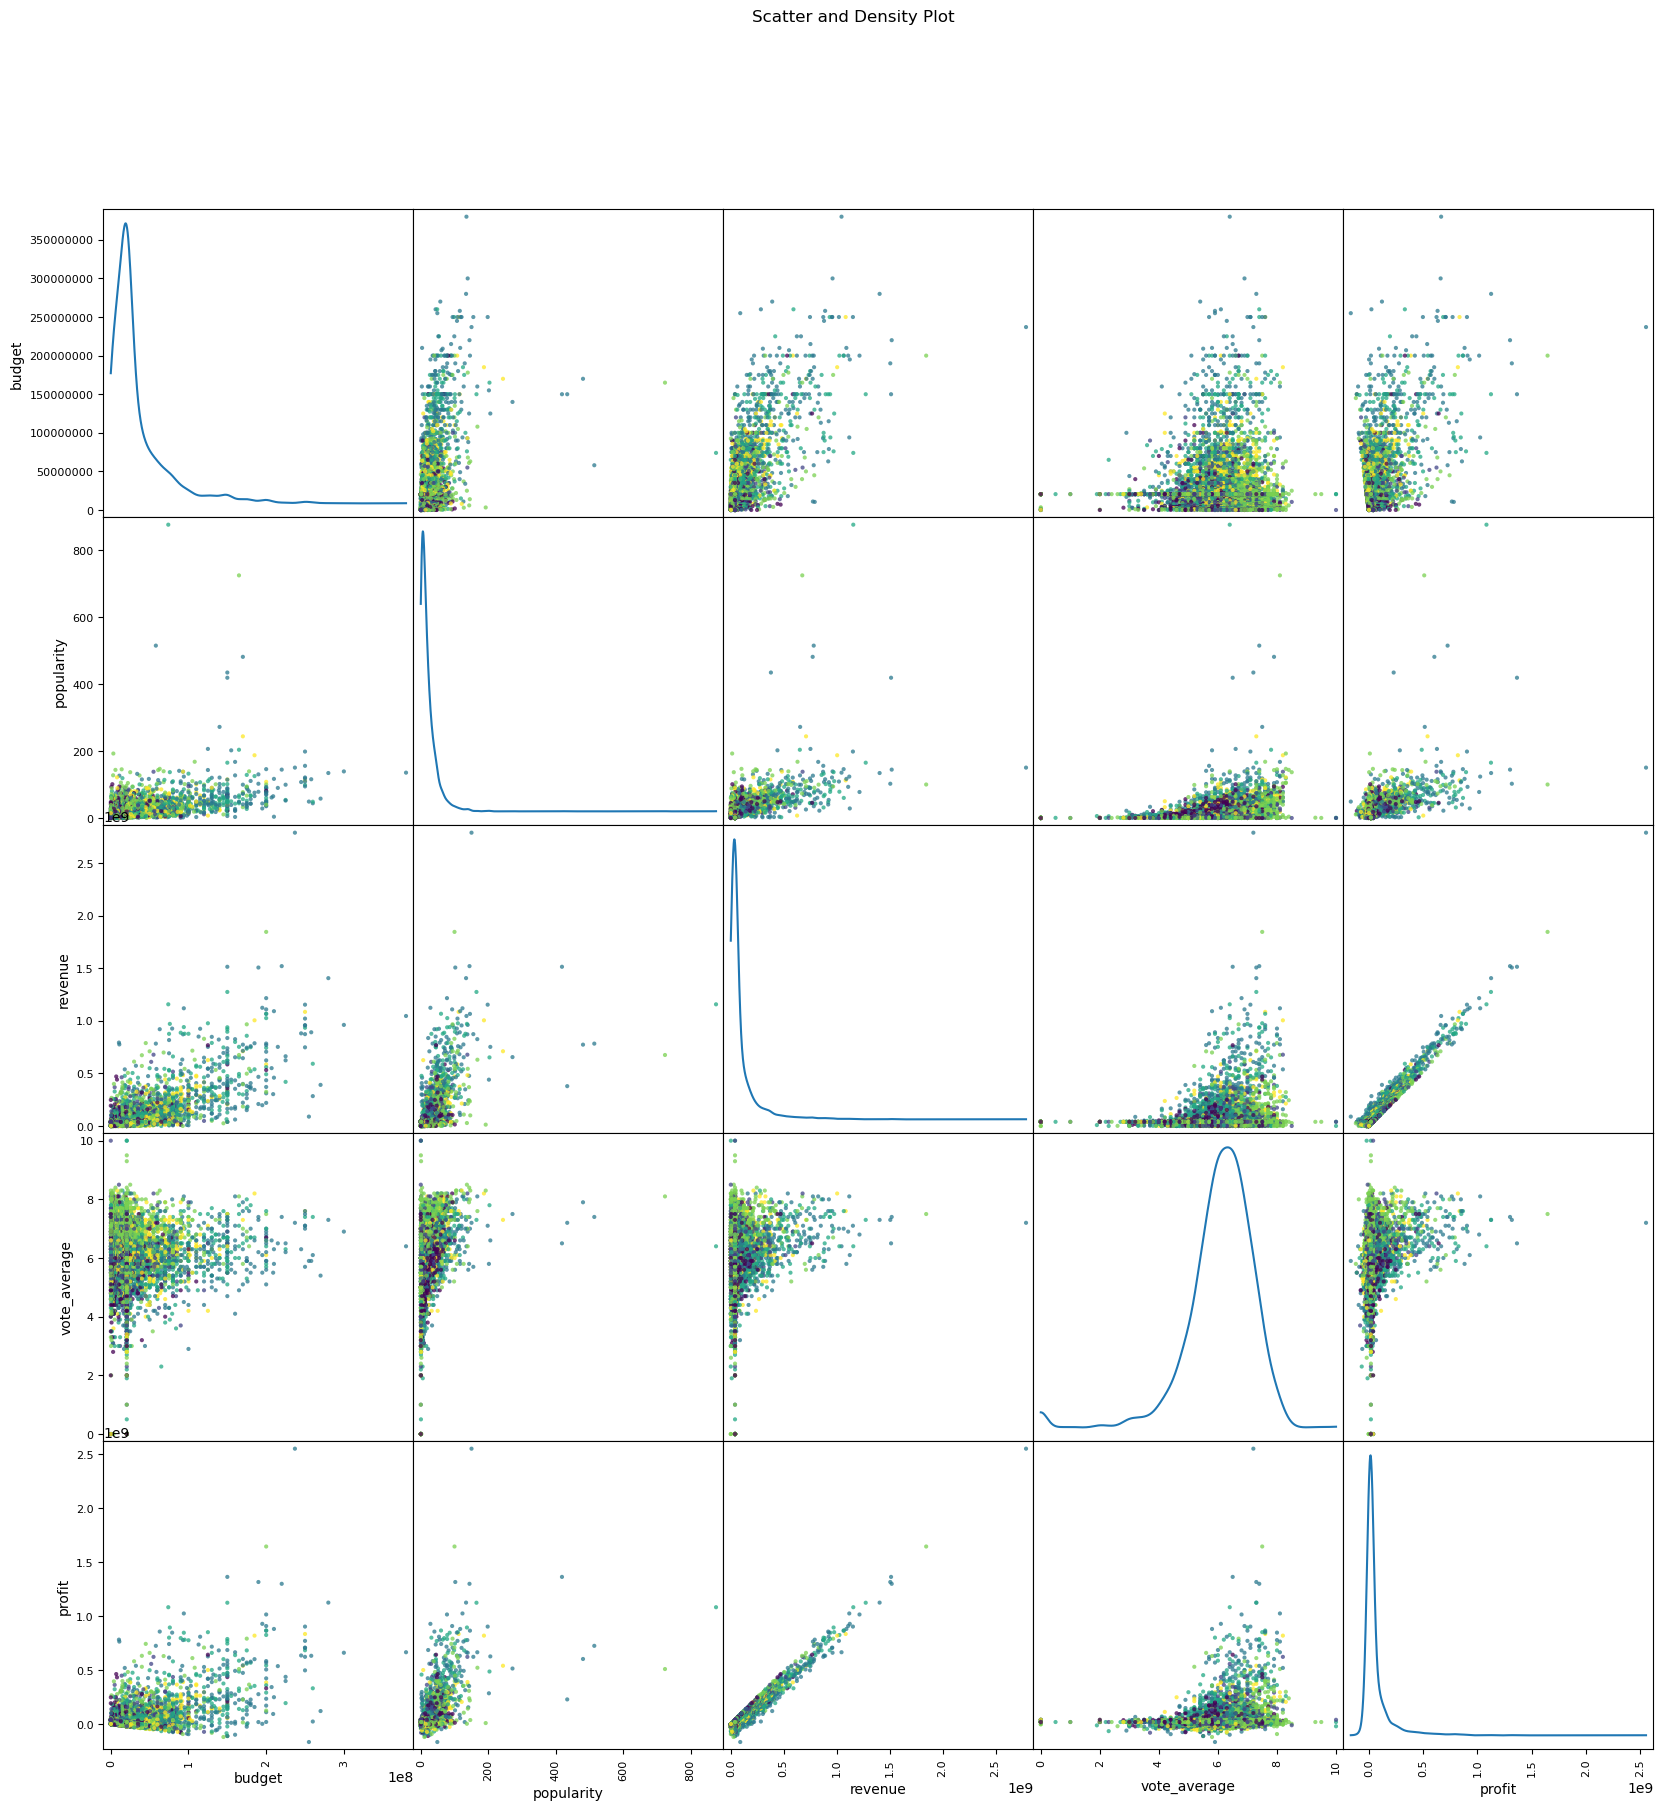

In [70]:
values=['budget', 'popularity', 'revenue', 'vote_average', 'profit']
plotScatterMatrixWithC(temp[values], plotSize=20, textSize=8,c_var=temp['kmeans_genres'])

In [71]:
def plot_distribution(df, column):
    # Calculate level count
    counts = df[column].value_counts()
    # Sort the counts in ascending order
    counts = counts.sort_index()
    # Create a color palette with the same number of colors as levels
    colors = sb.color_palette('cubehelix', len(counts))
    # Plotting
    counts.plot.bar(color=colors)
    plt.title('Distribution of Levels/Classes in ' + column)
    plt.xlabel('Levels/Classes')
    plt.ylabel('Count')
    plt.show()
# Usage:#plot_distribution(temp, 'kmeans')

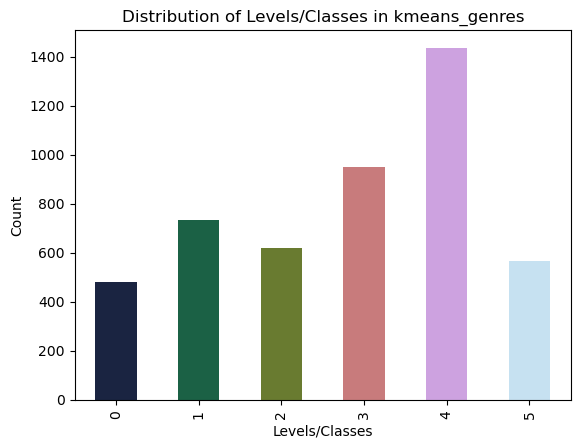

In [72]:
plot_distribution(temp, 'kmeans_genres')

In [73]:
temp.tail(1)

,budget,genres,id,original_title,popularity,production_companies,release_date,revenue,runtime,vote_average,...,history,music,family,adventure,action,animation,foreign,mystery,voted_as_good,kmeans_genres
4802,20580378,[documentary],25975,My Date with Drew,1.929883,"[rusty bear entertainment, lucky crow films]",2005-08-05,40004572,90.0,6.3,...,0,0,0,0,0,0,0,0,1,4


In [74]:
#looks like month factor plays a major role in clustering

In [75]:
def predict_cluster(genres, kmeans, genre_columns):
    # Initialize a new movie with all zeros
    new_movie = pd.DataFrame(data=[np.zeros(len(genre_columns))], columns=genre_columns)
    # Set the genres of the new movie to 1
    for genre in genres:
        if genre in new_movie.columns:
            new_movie[genre] = 1

    # Predict the cluster for the new movie
    predicted_cluster = kmeans.predict(new_movie)
    return predicted_cluster[0]

# Usage: print("The predicted cluster for the new movie is: ", predict_cluster(genres, kmeans, genre_columns))

In [76]:
genres = ['action', 'crime', 'thriller']  # replace with your genre names
print("The predicted cluster for the new movie is: ", predict_cluster(genres, kmeans, cols))

The predicted cluster for the new movie is:  5


In [77]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
def plot_boxplots(data, features, target):
    # Setting the style
    sb.set(style="whitegrid")
    # Setting the size of the plot
    plt.figure(figsize=(6, 3))
    # Loop through each feature and plot
    for i, feature in enumerate(features):
        plt.subplot(1, len(features), i + 1)
        sb.boxplot(x=target, y=feature, data=data)
        plt.title(f'{feature} vs {target}')
        plt.xlabel(target)
        plt.ylabel(feature)
    # Adjusting the layout
    plt.tight_layout()
    plt.show()
# Usage: plot_multiclass(temp, ['month'], 'kmeans')

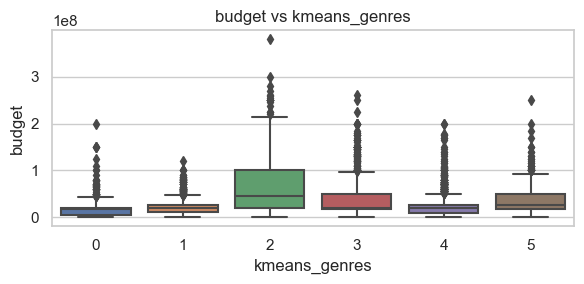

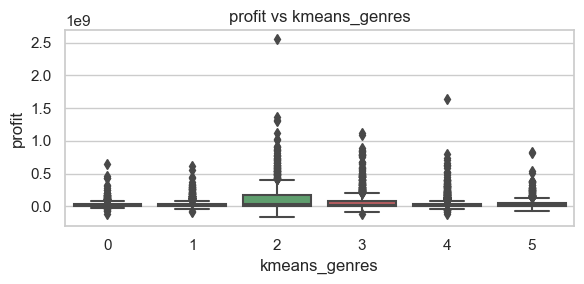

In [78]:
plot_boxplots(temp, ['budget'], 'kmeans_genres')
plot_boxplots(temp, ['profit'], 'kmeans_genres')

In [79]:
def plot_cluster_variables(df, column_names, cluster_column):
    num_variables = len(column_names)
    earthy_colors = ['#8B4513', '#CD853F', '#D2691E', '#A0522D', '#8B7E66', '#556B2F', '#808000', '#6B8E23', '#BDB76B', '#556B2F']
    num_rows = int(np.ceil(num_variables / 2))  # Adjust this if you want a different grid layout
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 2*num_rows))
    for j, var in enumerate(column_names):
        row = j // 2
        col = j % 2
        var_counts = df.groupby(cluster_column)[var].sum()
        # Select random earthy color
        color = np.random.choice(earthy_colors)
        var_counts.plot(kind='bar', ax=axes[row, col], title=f'{var} counts across clusters', color=color)
        axes[row, col].set_ylabel('Count')
        axes[row, col].set_xlabel('Clusters')
    # Hide unused subplots
    for i in range(num_variables, num_rows*2):
        fig.delaxes(axes.flatten()[i])
    plt.tight_layout()
    plt.show()
# Example usage: #plot_cluster_variables(temp, encoded_genres_cols, 'kmeans_genres')

In [80]:
def plot_cluster_variables_as1(df, column_names, cluster_column):
    cluster_counts = df.groupby(cluster_column)[column_names].sum()
    # Set a palette with bright colors
    sb.set_palette("bright")
    # Sort column_names alphabetically
    cluster_counts = cluster_counts[column_names].sort_index(axis=1)
    cluster_counts.T.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.xlabel('One-hot Encoded Variables')
    plt.ylabel('Count')
    plt.title('Counts of one-hot encoded variables across clusters')
    plt.legend(title='Cluster')
    plt.show()
# Example usage: plot_cluster_variables_as1(temp, encoded_genres_cols, 'kmeans_genres')

In [81]:
def plot_combinations(data, legend_column, measure_column, measure_notation='millions', data_pts_column='data_pts'):
    # Plotting
    plt.figure(figsize=(10, 6))
    sb.barplot(x=legend_column, y=measure_column, data=data, palette='bright')
    plt.xlabel('Combinations')
    plt.ylabel(f'{measure_column} ({measure_notation})')
    plt.title(f'{measure_column} and No. of Data Points by Combinations')
    # Add data points on top of the bars
    for i, v in enumerate(data[measure_column]):
        plt.text(i, v + 0.5, str(data[data_pts_column][i]), ha='center')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def format_number(num, notation="normal"):
    if notation == "billions":
        return num/1e9
    elif notation == "millions":
        return num/1e6
    elif notation == "thousands":
        return num/1e3
    elif notation == "hundreds":
        return num/1e2
    else:
        return num

def aggregate_results(temp, genre_combinations, measure, notat = 'normal'):
    # Create an empty list to store results
    result_data = []
    # Loop through each genre combination
    for combination in genre_combinations:
        # Convert all genres to lower case
        combination = [genre.lower() for genre in combination]
        # Filter data based on genre combination
        filtered_data = temp[temp[combination].eq(1).all(axis=1)]
        # If there are no rows matching the combination, skip to the next one
        if len(filtered_data) == 0:
            continue
        # Aggregate measure
        aggregated_measure = filtered_data[measure].sum()
        # Format aggregated measure to be in millions
        aggregated_measure = format_number(aggregated_measure, notation=notat)
        # Add data to the result list
        result_data.append({
            "combinations": ", ".join(combination),
            f"aggregated_{measure}_{notat}": aggregated_measure,
            "data_pts": len(filtered_data)
        })
    # Create DataFrame from the result list
    result_df = pd.DataFrame(result_data)
    return result_df
# Example usage: result = aggregate_results(temp, genre_combinations, "revenue")

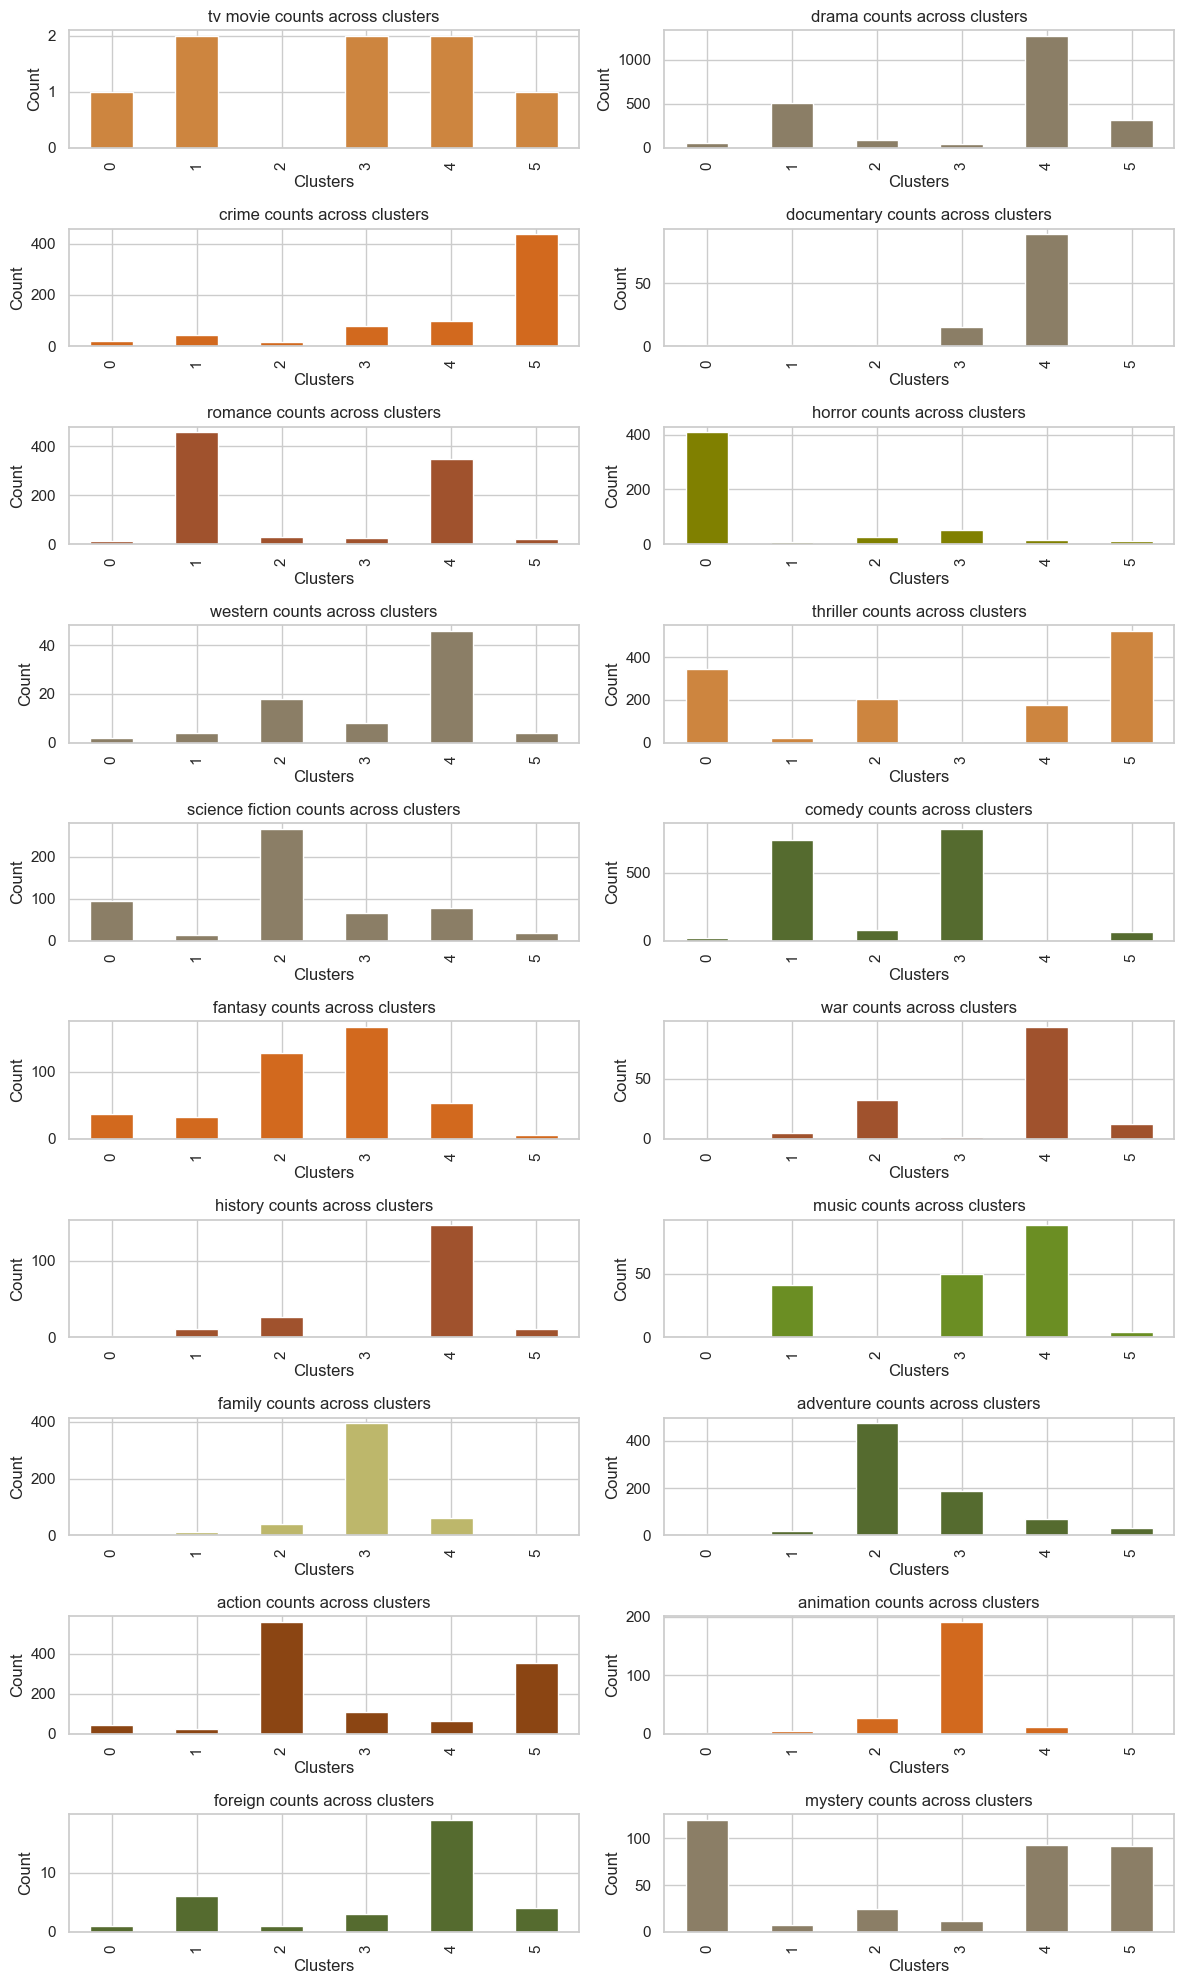

In [82]:
plot_cluster_variables(temp, encoded_genres_cols, 'kmeans_genres')

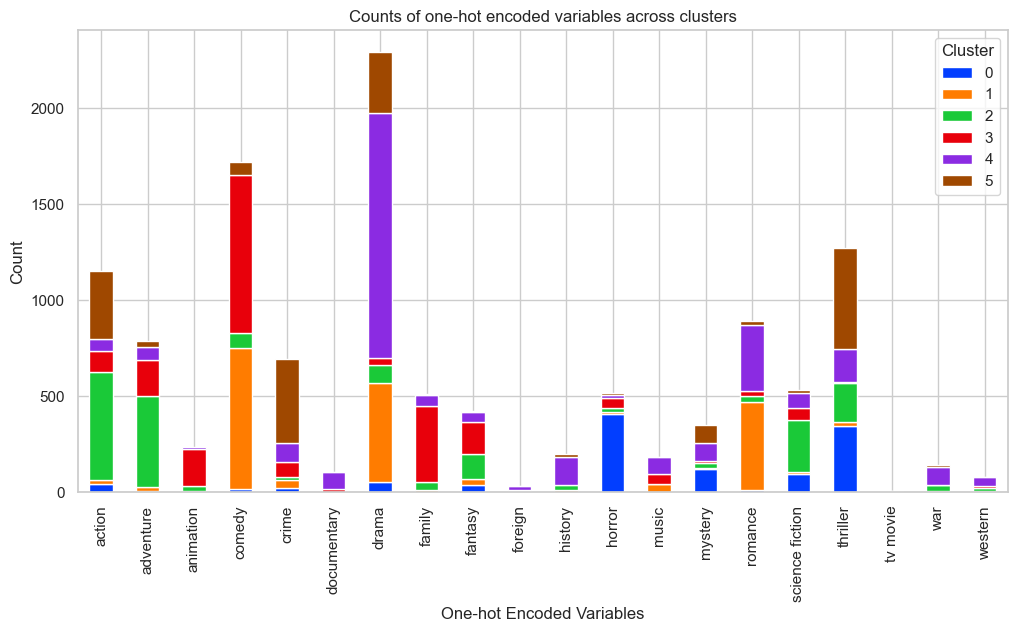

In [83]:
plot_cluster_variables_as1(temp, encoded_genres_cols, 'kmeans_genres')

We found this graph to be very useful in helping us interpret the findings of this model. We were able to identify which genres primarily belonged to which clusters. From this, we could deduce common combinations of genres in movies and subsequently spot any relationships with response variables, such as profit, which we will be doing.

It is important to note that due to the random positions of the intial centroids, there will be some variations to the results of this model every time we run it. This would result in slightly different assignments to clusters for the different genres. However, crucially, each iteration is still likely to produce similar patterns, which also indicates relatively strong correlations between the variables we used. 

In [84]:
# Common genre combinations identified
genre_combinations = [
    ["Action", "Thriller"],
    ["Romance", "Comedy"],
    ["Romance", "Drama"],
    ["Horror", "Thriller"],
    ["Crime", "Thriller"]
]

In [85]:
budget_result = aggregate_results(temp, genre_combinations, "budget", notat = 'millions')
budget_result['ave_budget_per_movie'] = budget_result['aggregated_budget_millions'] / budget_result['data_pts']
budget_result

,combinations,aggregated_budget_millions,data_pts,ave_budget_per_movie
0,"action, thriller",26644.117045,547,48.709538
1,"romance, comedy",12034.721159,484,24.865126
2,"romance, drama",13932.077470,602,23.142986
3,"horror, thriller",5731.247510,291,19.695009
4,"crime, thriller",13580.204851,414,32.802427


In [86]:
profit_result = aggregate_results(temp, genre_combinations, "profit", notat = 'millions')
profit_result['ave_profit_per_movie'] = profit_result['aggregated_profit_millions'] / profit_result['data_pts']
profit_result

,combinations,aggregated_profit_millions,data_pts,ave_profit_per_movie
0,"action, thriller",40348.132847,547,73.762583
1,"romance, comedy",21828.692475,484,45.100604
2,"romance, drama",26554.055507,602,44.109727
3,"horror, thriller",10375.891653,291,35.655985
4,"crime, thriller",16832.906220,414,40.659194


In [87]:
budget_profit_in1df = pd.merge(budget_result, profit_result, on='combinations', how='inner')
budget_profit_in1df['data_pts']=budget_profit_in1df['data_pts_x']
budget_profit_in1df = budget_profit_in1df.drop(['data_pts_x', 'data_pts_y'], axis=1)
budget_profit_in1df

,combinations,aggregated_budget_millions,ave_budget_per_movie,aggregated_profit_millions,ave_profit_per_movie,data_pts
0,"action, thriller",26644.117045,48.709538,40348.132847,73.762583,547
1,"romance, comedy",12034.721159,24.865126,21828.692475,45.100604,484
2,"romance, drama",13932.077470,23.142986,26554.055507,44.109727,602
3,"horror, thriller",5731.247510,19.695009,10375.891653,35.655985,291
4,"crime, thriller",13580.204851,32.802427,16832.906220,40.659194,414


In [88]:
from matplotlib.ticker import MultipleLocator
def plot_combinations_vs_budget_profit(combinations, ave_budget_per_movie, ave_profit_per_movie, yscale='linear'):
    plt.figure(figsize=(20, 10))
    plt.plot(combinations, ave_budget_per_movie, label='Average Budget per Movie', marker='o', markersize=14)  # Adjust marker size
    plt.plot(combinations, ave_profit_per_movie, label='Average Profit per Movie', marker='o', markersize=14)  # Adjust marker size
    plt.fill_between(combinations, ave_budget_per_movie, ave_profit_per_movie, color='orange', alpha=0.5)
    plt.fill_between(combinations, ave_budget_per_movie, color='lightblue', alpha=0.8)
    plt.xlabel('Combinations', fontsize=16)  # Adjust fontsize for x-axis label
    plt.ylabel('Amount in Millions', fontsize=16)  # Adjust fontsize for y-axis label
    plt.title('Average Budget and Profit per Movie by Combinations', fontsize=20)  # Adjust fontsize for title
    plt.legend(fontsize=16)  # Adjust fontsize for legend
    plt.grid(True)
    plt.ylim(bottom=0)  # Ensure y-axis starts from 0
    plt.yscale(yscale)  # Set the scale of y-axis
    plt.gca().yaxis.set_major_locator(MultipleLocator(10))  # Set scale for each step to 10 on y-axis
    plt.show()
# Example usage: plot_combinations_vs_budget_profit(budget_profit_in1df['combinations'], budget_profit_in1df['ave_budget_per_movie'], budget_profit_in1df['ave_profit_per_movie'], yscale='linear')

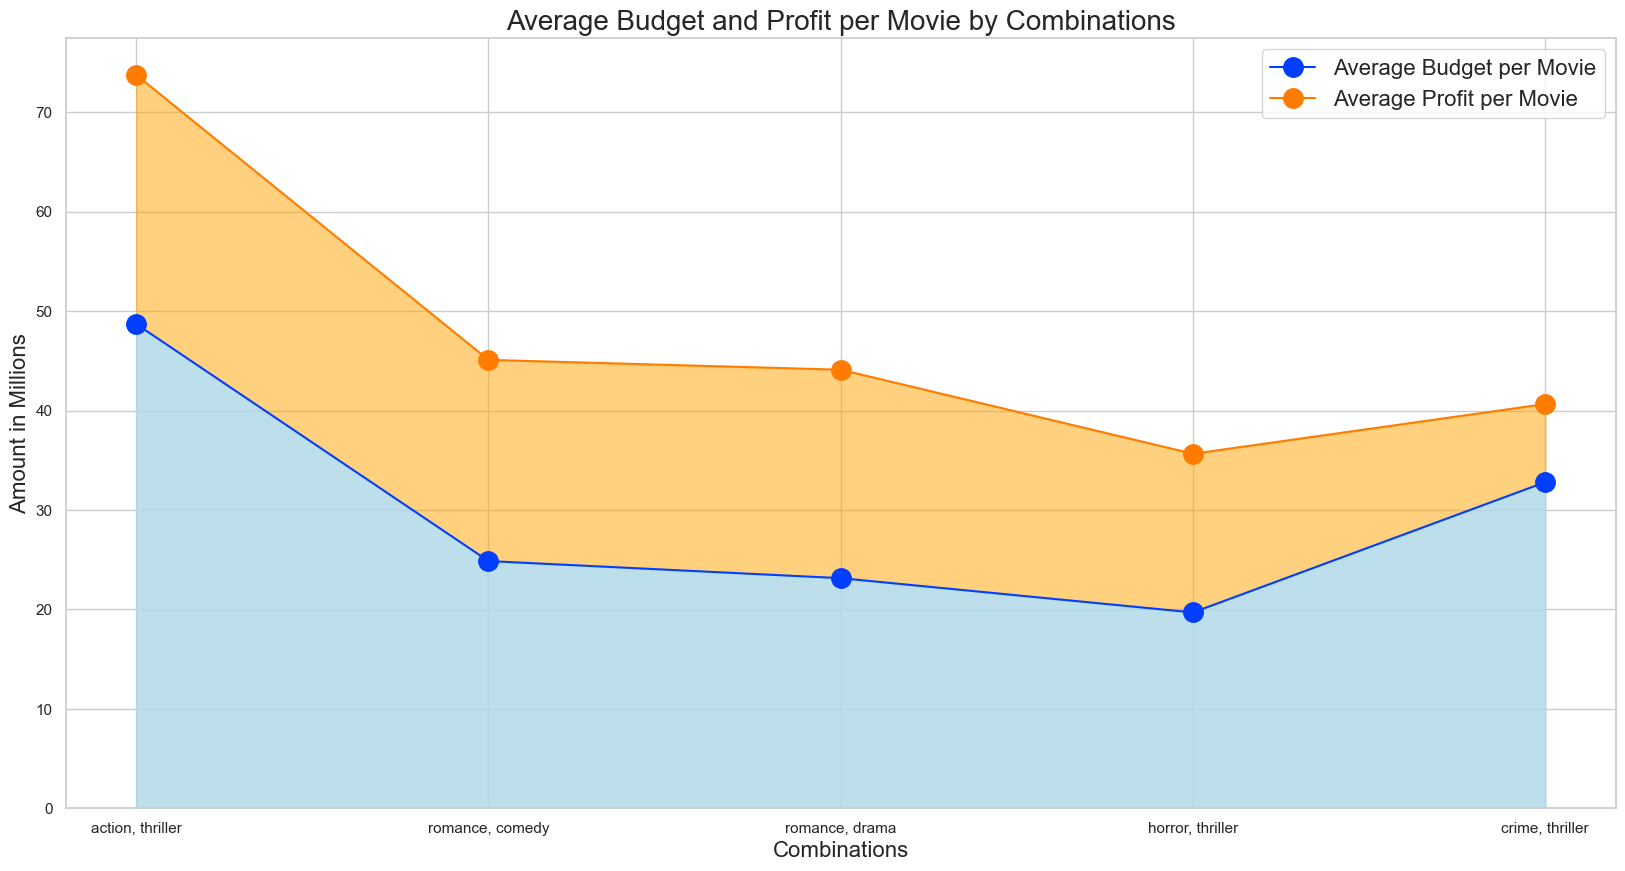

In [89]:
plot_combinations_vs_budget_profit(budget_profit_in1df['combinations'], budget_profit_in1df['ave_budget_per_movie'], budget_profit_in1df['ave_profit_per_movie'], yscale='linear')

This graph helps us to see and compare the profitability of each common genre combination, with respect to its budget. 

# Conclusion

When we started this mini-project, our goal was to see if we could predict **a movie's success** fairly accurately using relevant information about it. We wanted to find patterns among past successful movies to see if there's a formula filmmakers could use to boost **ratings** or **profits**, which we decided were the main measures of success.

As we went through the data and analyzed the results, we realised that finding any meaningful correlations is likely to take more than just plotting simple linear relationships. Real-life scenarios are more unpredictable, becaues of countless external factors that we cannot account for. In the context of our problem, we quickly found out that it's nearly impossible to find a variable, or a combination of variables, or even a machine learning model that reliably predicts **a movie's success**.

Other factors include:
- **Cast**
- Effectiveness of the **marketing campaign**
- Effects of being a part of **movie franchises**
- The actual **storyline** itself

These pieces of information are either complex to quantify or simply unavailable in our dataset.

Nevertheless, our research did accomplish some of our initial goals to some extent. We were able to establish moderately strong correlations, though far from perfect, among several groups of variables. Each model and technique we used helped us understand a bit more about how individual variables influence **a movie's success**.

In conclusion, while there's some correlation between certain aspects of a movie and its performance, these relationships aren't as simple as we thought. There is no easy way of guaranteeing that a movie would be profitable and well-received. Utilising machine learning models and techniques can still help us make educated guesses, but don't be surprised if **a movie's performance** defies our expectations.

In addition, we believe that we could further improve the quality of our findings if given a complete dataset, with more variables, such as **cast and crew**, and information on the **marketing campaign**. Adding more variables would help us get a more complete idea and understanding of what goes into the success of movies, and thus provide better predictions and achieve our goal.

# The end! Thanks!